# **Walmart Capstone Project By Sakshi Srivastava**

# Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

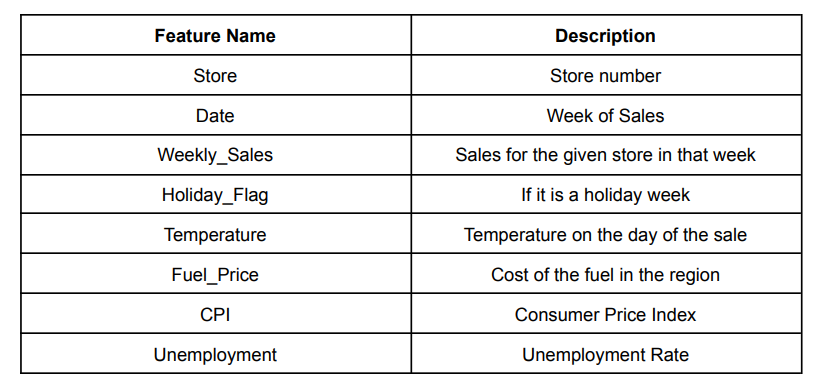


# **1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:**

**a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

**c. Does temperature affect the weekly sales in any manner?**

**d. How is the Consumer Price index affecting the weekly sales of various stores?**

**e. Top performing stores according to the historical data.**

**f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**


# **Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error,mean_squared_error
from pandas.tseries.offsets import DateOffset

# **Loading the Dataset**

In [3]:
df=pd.read_csv(r'/content/Walmart DataSet.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

# Basic checks of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# from above we can see that there is no null values, as the 'Date' column is of object dtype , we can change it further to datetime dtype when required

In [5]:
# Let's check for duplicates : -
df.duplicated().sum()

np.int64(0)

In [6]:
# STORES IN DATASETS
print(df['Store'].unique())
# VALUES IN EACH STORE
df.groupby(by='Store')['Weekly_Sales'].count().reset_index()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


Store  Weekly_Sales
0       1           143
1       2           143
2       3           143
3       4           143
4       5           143
5       6           143
6       7           143
7       8           143
8       9           143
9      10           143
10     11           143
11     12           143
12     13           143
13     14           143
14     15           143
15     16           143
16     17           143
17     18           143
18     19           143
19     20           143
20     21           143
21     22           143
22     23           143
23     24           143
24     25           143
25     26           143
26     27           143
27     28           143
28     29           143
29     30           143
30     31           143
31     32           143
32     33           143
33     34           143
34     35           143
35     36           143
36     37           143
37     38           143
38     39           143
39     40           143
40     41           143
41     42           143
42     43           143
43     44           143
44     45           143

# Insights:

* we have 45 different stores and every store have 143 records.

# Let's make 5 Stores for the further analysis

In [7]:
# let's choose the random 5 stores for our analysis

import random     # import random for using the random selections
random.seed(5)    # random.seed() helps in having same random values

# let's create an empty list for storing our random "Store'
Store_List=[]
for i in range(5):                   # as we require 5 stores so therefore 5 is selected
     i=random.randint(1,45)
     Store_List.append(i)

print(f"Store List : {Store_List}")

Store List : [40, 17, 23, 45, 42]


# Let's map the store values for making ease to access

In [8]:
#Store_1
Store_1=df[df['Store']==Store_List[0]]
print(f"Store_1 is mapped to actual Store {Store_List[0]}")

#Store_2
Store_2=df[df['Store']==Store_List[1]]
print(f"Store_2 is mapped to actual Store {Store_List[1]}")

#Store_3
Store_3=df[df['Store']==Store_List[2]]
print(f"Store_3 is mapped to actual Store {Store_List[2]}")

#Store_4
Store_4=df[df['Store']==Store_List[3]]
print(f"Store_4 is mapped to actual Store {Store_List[3]}")

#Store_5
Store_5=df[df['Store']==Store_List[4]]
print(f"Store_5 is mapped to actual Store {Store_List[4]}")

Store_1 is mapped to actual Store 40
Store_2 is mapped to actual Store 17
Store_3 is mapped to actual Store 23
Store_4 is mapped to actual Store 45
Store_5 is mapped to actual Store 42


In [9]:
Store_2.head(3)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2288     17  05-02-2010     789036.02             0        23.11       2.666   
2289     17  12-02-2010     841951.91             1        18.36       2.671   
2290     17  19-02-2010     800714.00             0        25.06       2.654   

             CPI  Unemployment  
2288  126.442065         6.548  
2289  126.496258         6.548  
2290  126.526286         6.548

# **1. a) If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

In [10]:
print(f"Correlation Coef_ b/w Unemployment & Weekly_Sales of Dataset: {df[['Unemployment','Weekly_Sales']].corr(numeric_only=True)['Weekly_Sales'][0]}")

Correlation Coef_ b/w Unemployment & Weekly_Sales of Dataset: -0.10617608965795232


# as the value of correlation b/w Weekly_sales and Unemployment is -0.106, it clearifies that there is no sign of any dependencies on each other and correlation b/w these two are near to zero.

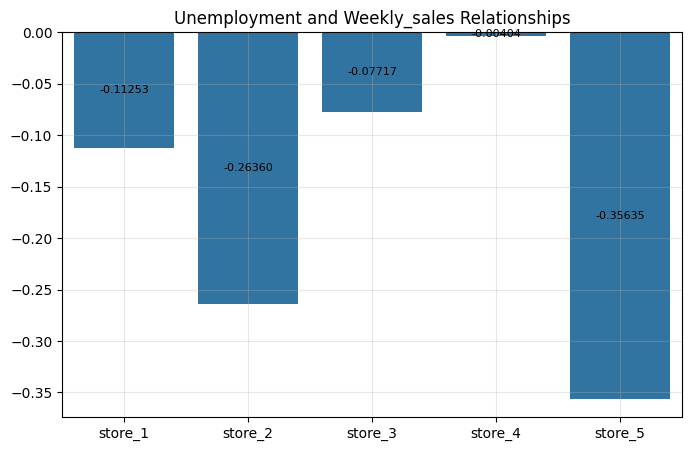

In [11]:
# Lets' see the visual representation of correlation of individual store
# create a variable to represent the stores
x_axis=['store_1','store_2','store_3','store_4','store_5']
# creating  instances that hold the correlation value of each store for weekly_sales & unemployment
value_1=Store_1[['Unemployment','Weekly_Sales']].corr()['Weekly_Sales'][0]
value_2=Store_2[['Unemployment','Weekly_Sales']].corr()['Weekly_Sales'][0]
value_3=Store_3[['Unemployment','Weekly_Sales']].corr()['Weekly_Sales'][0]
value_4=Store_4[['Unemployment','Weekly_Sales']].corr()['Weekly_Sales'][0]
value_5=Store_5[['Unemployment','Weekly_Sales']].corr()['Weekly_Sales'][0]
y_axis=[value_1,value_2,value_3,value_4,value_5]

# visual
plt.figure(figsize=(8,5))
ax=sns.barplot(x=x_axis,y=y_axis)
for i in ax.containers:
    ax.bar_label(i,fontsize=8,fmt='{:,.5f}',label_type='center')
plt.title("Unemployment and Weekly_sales Relationships")
plt.grid(alpha=0.30)
plt.show()

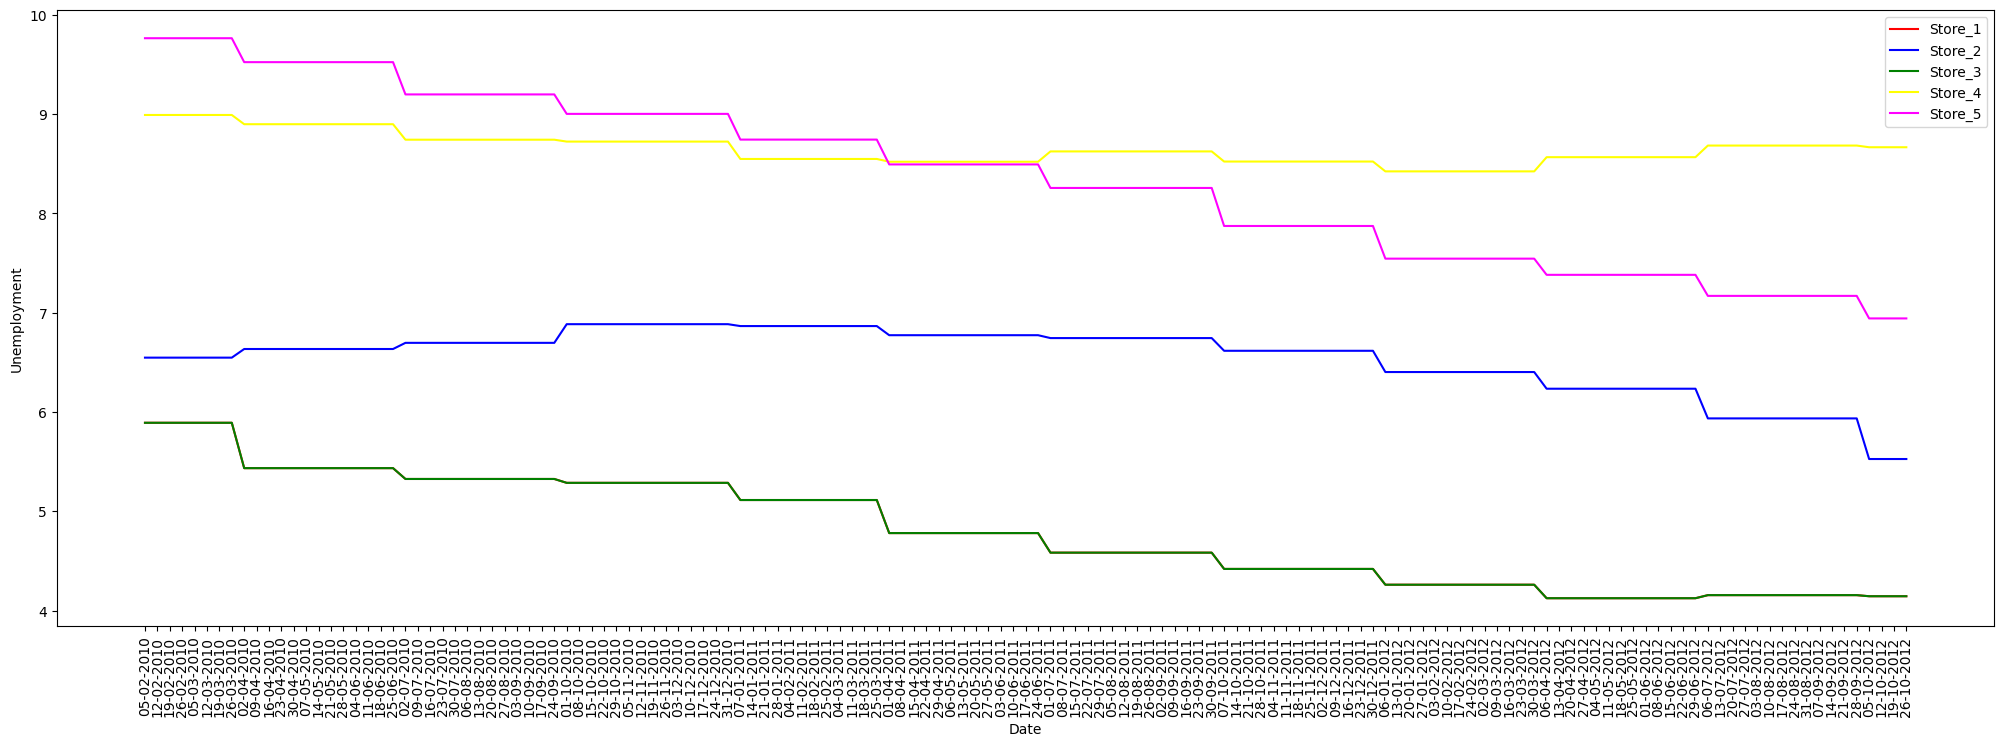

In [12]:
plt.figure(figsize=(25,8))
sns.lineplot(Store_1,x='Date',y='Unemployment',color='red',label='Store_1')
sns.lineplot(Store_2,x='Date',y='Unemployment',color='blue',label='Store_2')
sns.lineplot(Store_3,x='Date',y='Unemployment',color='green',label='Store_3')
sns.lineplot(Store_4,x='Date',y='Unemployment',color='yellow',label='Store_4')
sns.lineplot(Store_5,x='Date',y='Unemployment',color='magenta',label='Store_5')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

# Insights from above graphs

# negative correlation of Store_5 is more than any other stores therefore it is week negative relation b/w unemployment and weekly_sales

# among all five stores , Store_5=(Store 42) is having have high decline in employment rate.

# **1. b) If the weekly sales show a seasonal trend, when and what could be the reason?**


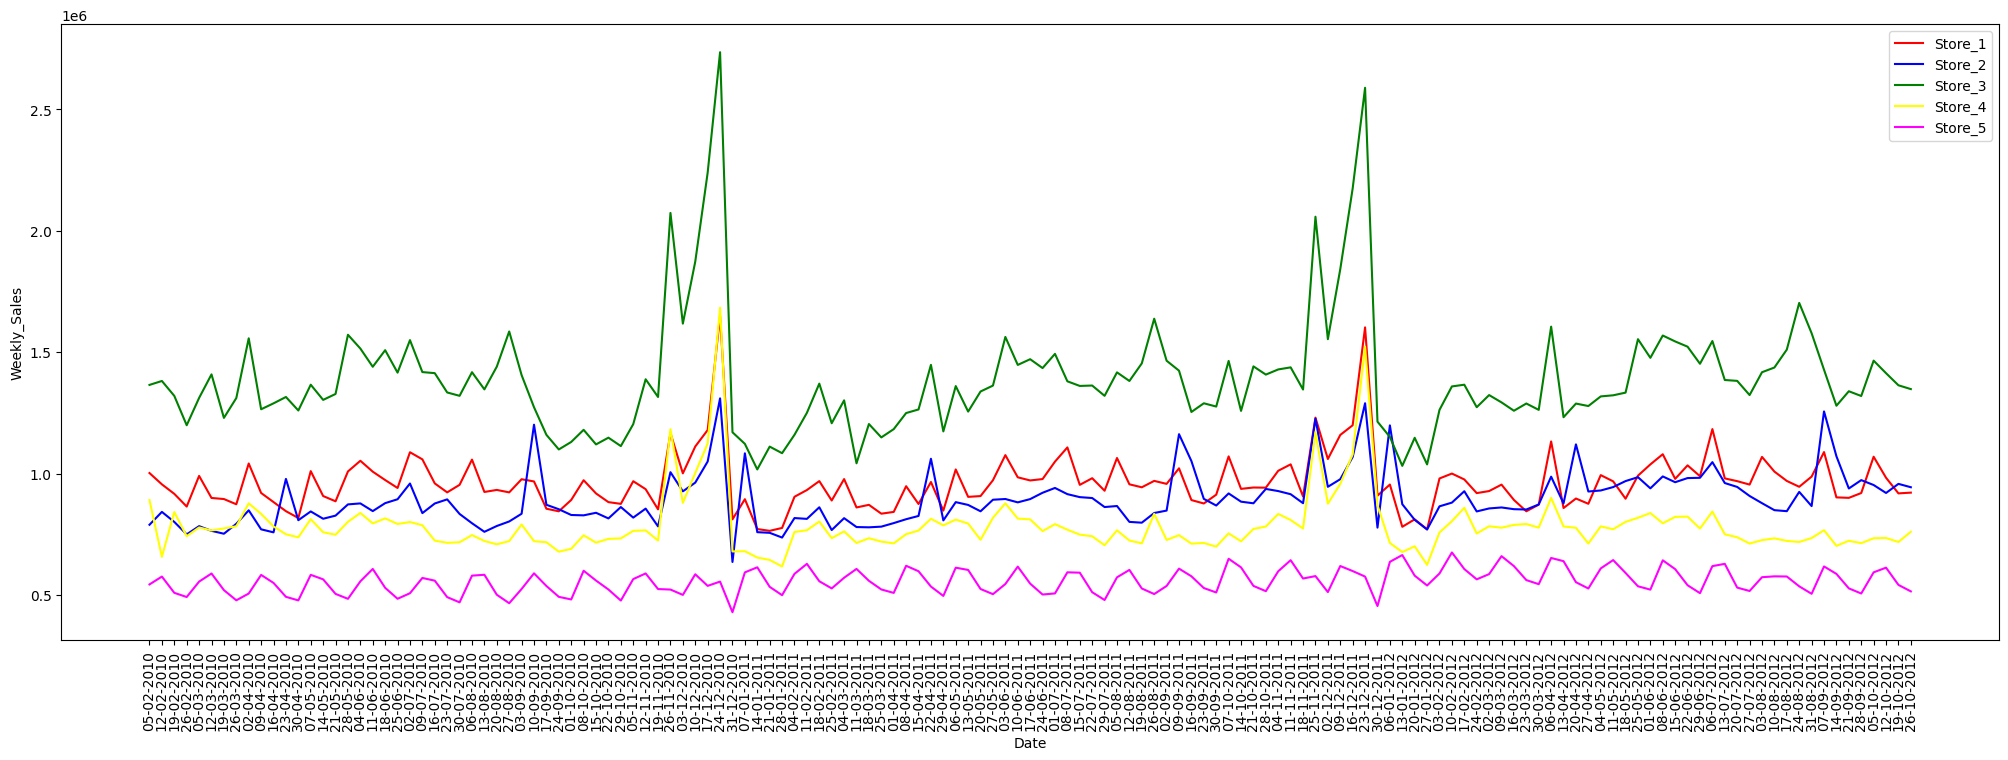

In [13]:
plt.figure(figsize=(25,8))
sns.lineplot(Store_1,x='Date',y='Weekly_Sales',color='red',label='Store_1')
sns.lineplot(Store_2,x='Date',y='Weekly_Sales',color='blue',label='Store_2')
sns.lineplot(Store_3,x='Date',y='Weekly_Sales',color='green',label='Store_3')
sns.lineplot(Store_4,x='Date',y='Weekly_Sales',color='yellow',label='Store_4')
sns.lineplot(Store_5,x='Date',y='Weekly_Sales',color='magenta',label='Store_5')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

# All store follows a seasonal trend except Store_5==(Store 42).
# The Seasonality shows that there is high Sales in store at time form mid-November to late December

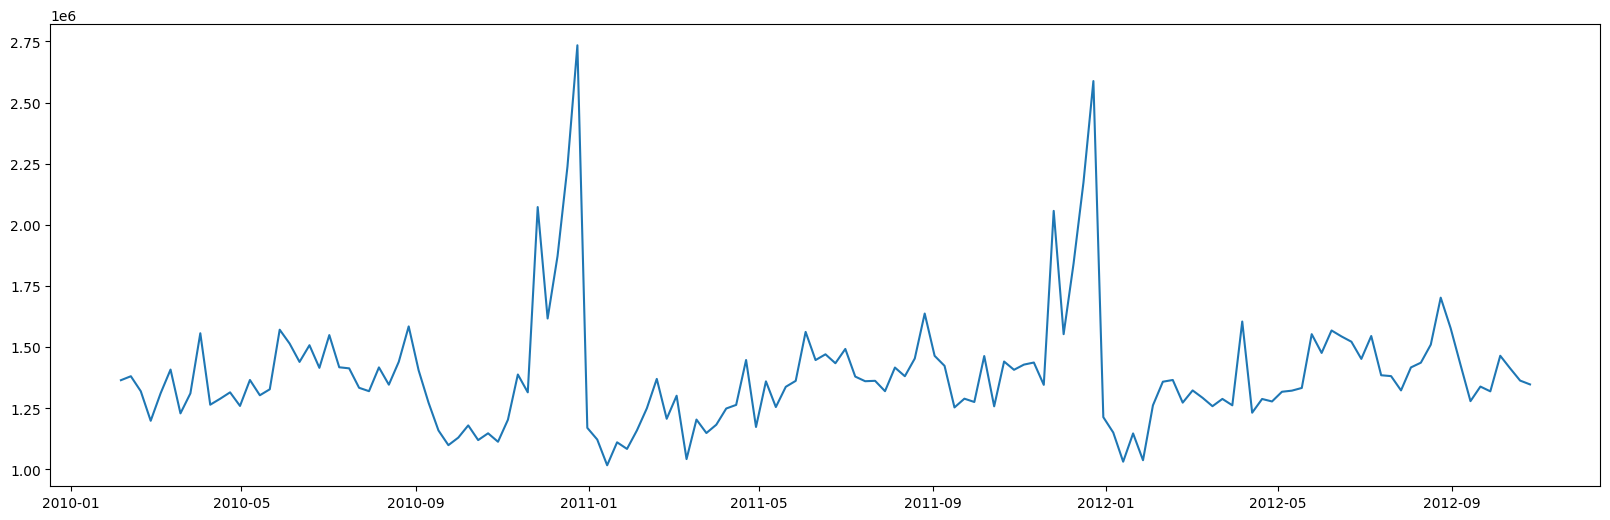

In [14]:
# let's decompose the store_3

new_store_3=pd.DataFrame()
new_store_3['Date']=pd.to_datetime(Store_3['Date'],format="%d-%m-%Y")
new_store_3['Sales']=Store_3['Weekly_Sales']

plt.figure(figsize=(20,6))
new_store_3.set_index('Date',inplace=True)
plt.plot(new_store_3)
plt.show()

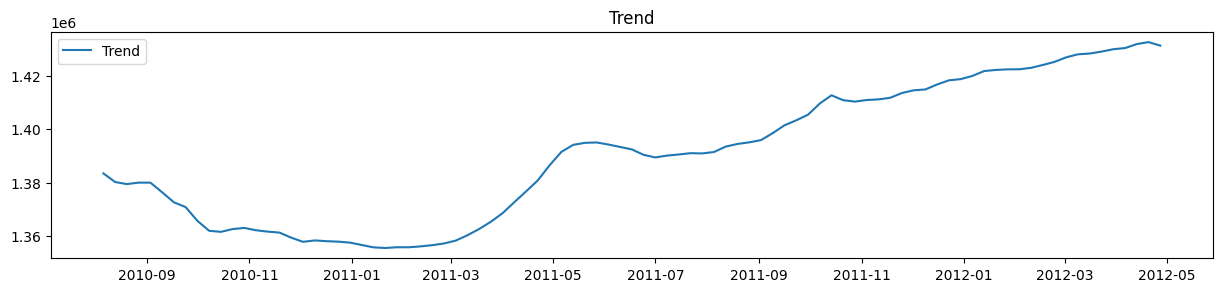

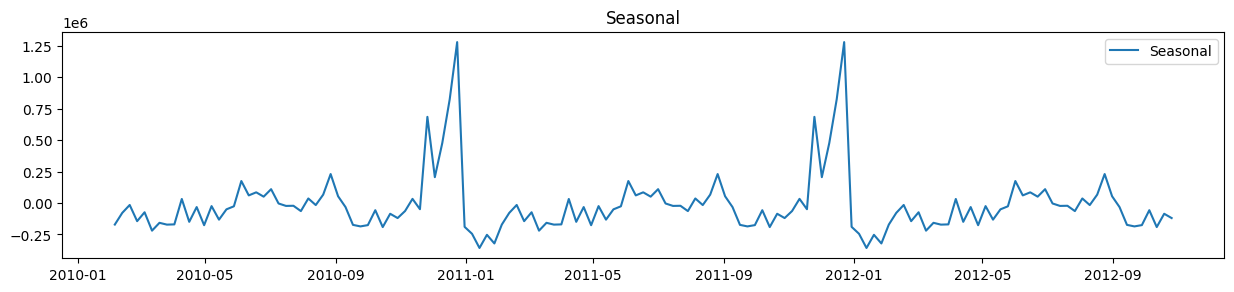

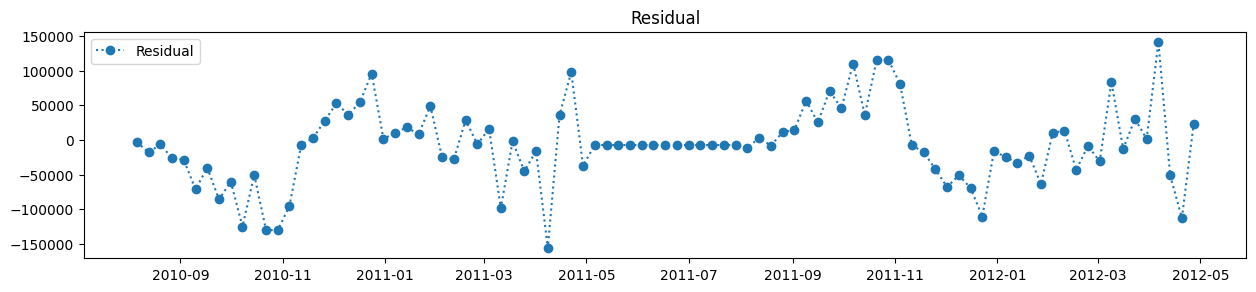

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(new_store_3)

# Trend
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(decomposed.trend,label="Trend")
plt.title("Trend")
plt.legend()
plt.show()
# Seasonal
plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
plt.plot(decomposed.seasonal,label="Seasonal")
plt.title("Seasonal")
plt.legend()
plt.show()
# Residual
plt.figure(figsize=(15,10))
plt.subplot(3,1,3)
plt.plot(decomposed.resid,label="Residual",ls=':',marker='o')
plt.title("Residual")
plt.legend()
plt.show()

# **c) Does temperature affect the weekly sales in any manner?**


In [16]:
print(f"Corr_Coef_ for Temperature and Weekly_Sales : {df[['Temperature','Weekly_Sales']].corr()['Weekly_Sales'][0]}")

Corr_Coef_ for Temperature and Weekly_Sales : -0.06381001317946852


# As we can see that there is no correlation b/w Temperature and Weekly Sales, as it is near to zero.

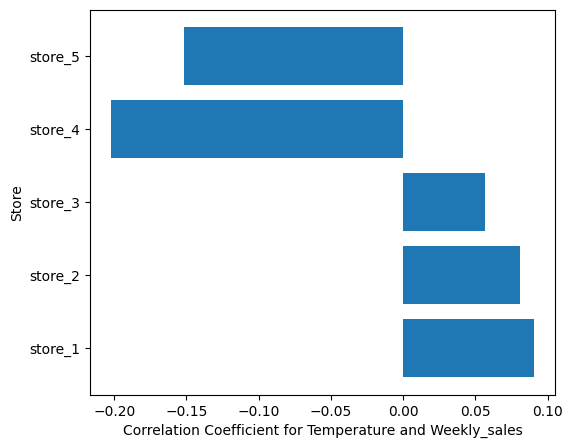

In [17]:
#let's check the correlation b/w 'Temperature' and "Weekly_Sales" to fully understands whats going on

corr_1=Store_1[['Temperature','Weekly_Sales']].corr()['Temperature'][1]
corr_2=Store_2[['Temperature','Weekly_Sales']].corr()['Temperature'][1]
corr_3=Store_3[['Temperature','Weekly_Sales']].corr()['Temperature'][1]
corr_4=Store_4[['Temperature','Weekly_Sales']].corr()['Temperature'][1]
corr_5=Store_5[['Temperature','Weekly_Sales']].corr()['Temperature'][1]

xx=['store_1','store_2','store_3','store_4','store_5']
yy=[corr_1,corr_2,corr_3,corr_4,corr_5]

plt.figure(figsize=(6,5))
plt.barh(y=xx,width=yy)
plt.xlabel("Correlation Coefficient for Temperature and Weekly_sales")
plt.ylabel("Store")
plt.show()

# Insights - as we have weak negative correlation b/w temperature and weekly_sales for Store_4 and Store_5, and week positive correlation b/w  the Store_1,Store_2 & Store_3

# **d) How is the Consumer Price index affecting the weekly sales of various stores?**

In [18]:
print(f"Corr_Coef_ of CPI & Weekly_Sales : {df[['CPI','Weekly_Sales']].corr()['Weekly_Sales'][0]}")

Corr_Coef_ of CPI & Weekly_Sales : -0.0726341620401742


# for the dataset the correlation is near to zero for CPI and Weekly_Sales. Let's check for individual Store.

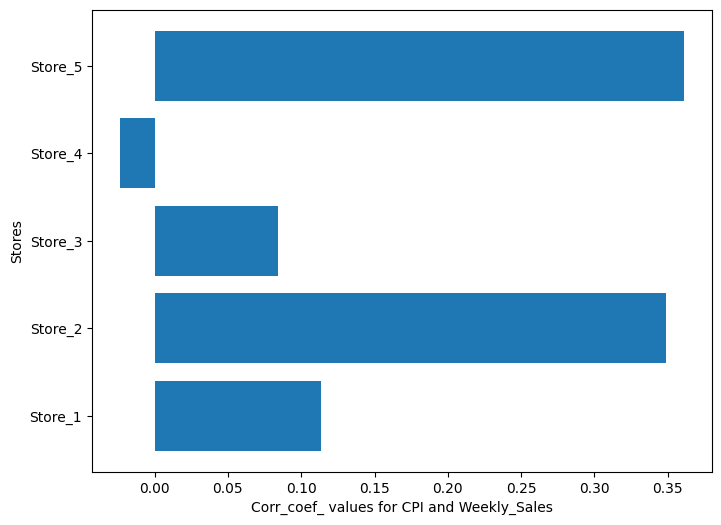

In [19]:
# let's see the correlation between CPI and Weekly_sales for individual Store and then see the insights


rel_1=Store_1[['CPI','Weekly_Sales']].corr()["CPI"][1]
rel_2=Store_2[['CPI','Weekly_Sales']].corr()["CPI"][1]
rel_3=Store_3[['CPI','Weekly_Sales']].corr()["CPI"][1]
rel_4=Store_4[['CPI','Weekly_Sales']].corr()["CPI"][1]
rel_5=Store_5[['CPI','Weekly_Sales']].corr()["CPI"][1]

#plotting/Visualization makes easy to understand
plt.figure(figsize=(8,6))
plt.barh(y=['Store_1','Store_2','Store_3','Store_4','Store_5'],width=[rel_1,rel_2,rel_3,rel_4,rel_5])
plt.xlabel("Corr_coef_ values for CPI and Weekly_Sales")
plt.ylabel("Stores")
plt.show()

# Insights - Store 2 and Store 5 have weak positive relationship with CPI and Weekly Sales and others are near to zero. So in our dataset it is possible that some store may have slight positive relationship with CPI and Weekly_Sales but majority of stores have a zero correlation.

# **e) Top performing stores according to the historical data.**

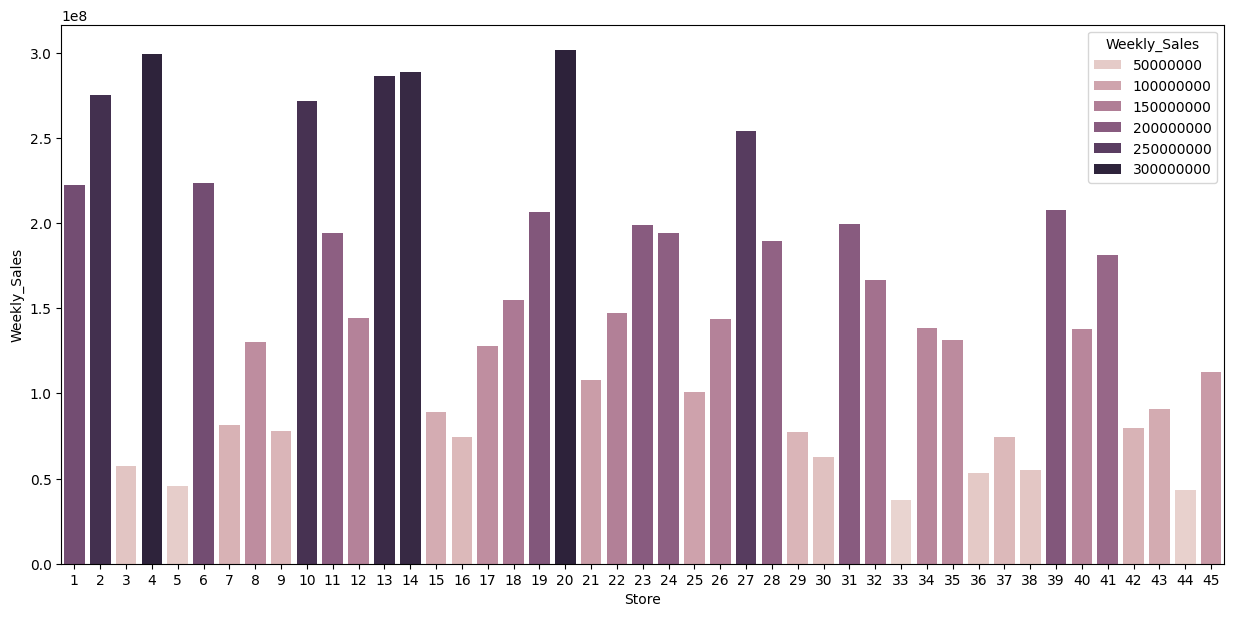

In [20]:
# let's see the total_Sales according to Store
gg=df.groupby(by='Store').sum()['Weekly_Sales'].reset_index()  #grouping by Store and aggregating by sum of weekly_sales

#visualize
plt.figure(figsize=(15,7))
sns.barplot(data=gg,x='Store',y='Weekly_Sales',hue='Weekly_Sales')
plt.show()

# Top 10 Stores

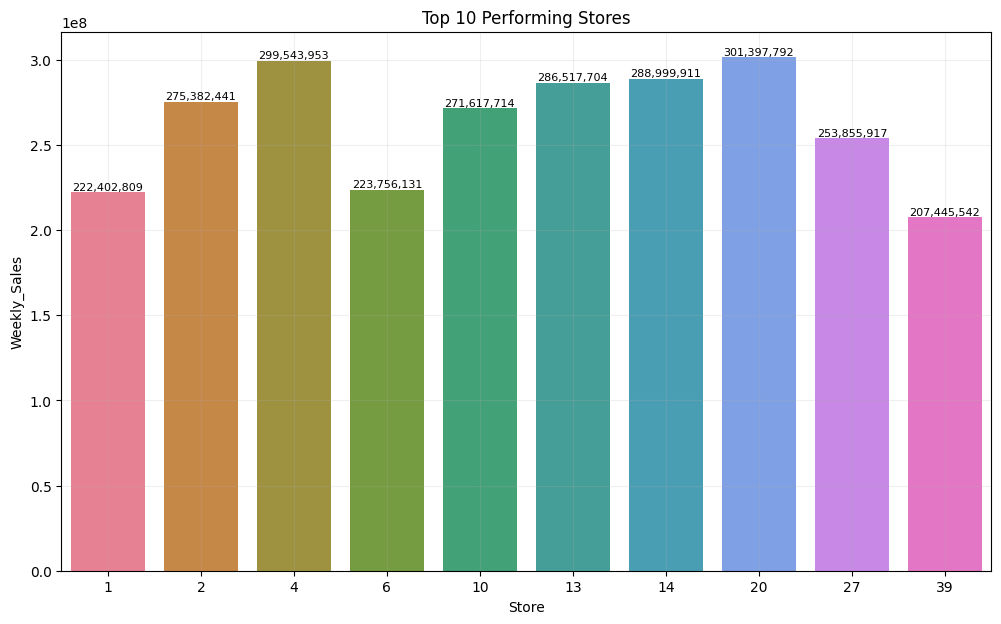

In [21]:
# let's see the top-10 performing stores
top_10_stores=gg.sort_values('Weekly_Sales',ascending=False).head(10)

#visualize
plt.figure(figsize=(12,7))

ax=sns.barplot(data=top_10_stores,x='Store',y='Weekly_Sales',palette='husl',errorbar=None)
for i in ax.containers:
   ax.bar_label(i,fontsize=8,fmt='{:,.0f}',label_type='edge')
plt.title("Top 10 Performing Stores")
plt.grid(alpha=0.2)
plt.show()

In [22]:
top_10_stores.round()

Store  Weekly_Sales
19     20   301397792.0
3       4   299543953.0
13     14   288999911.0
12     13   286517704.0
1       2   275382441.0
9      10   271617714.0
26     27   253855917.0
5       6   223756131.0
0       1   222402809.0
38     39   207445542.0

# Insights - as from above barplot we can see that Store_20 is the best performer among all and Store_4 hold the second position.

# **f) The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

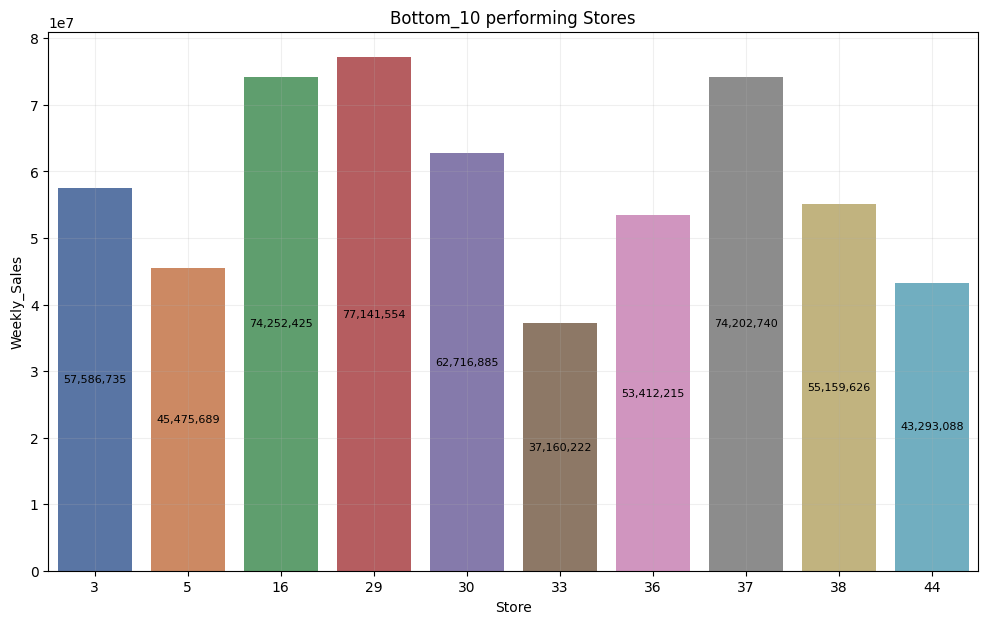

In [23]:
# seeing bottom 10 performing stores
bottom_10_stores=gg.sort_values('Weekly_Sales',ascending=True).head(10)

#plotting/visualize

plt.figure(figsize=(12,7))
ax1=sns.barplot(data=bottom_10_stores,x='Store',y='Weekly_Sales',palette='deep')
for j in ax1.containers:
  ax1.bar_label(j,fontsize=8,fmt='{:,.0f}',label_type='center')
plt.title("Bottom_10 performing Stores")
plt.grid(alpha=0.20)
plt.show()

# Insights - Store_33 is having lowest/poor performance , let's compare it with top performer Store_20

The Significance Difference b/w Highest and Lowest peforming store : 264237570.50000006


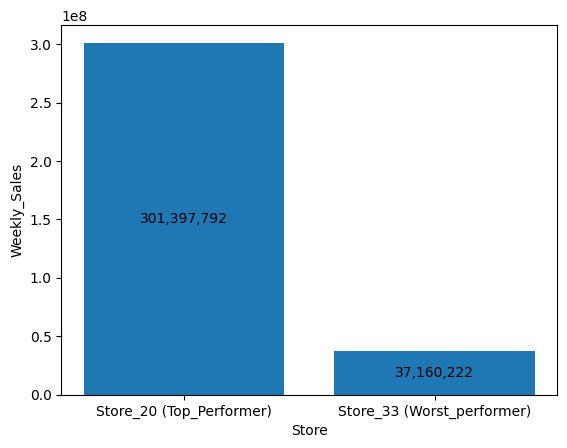

In [24]:
# let's calculate sum of sales of both stores and see the difference

# total_sales_for Store_20
top_performer=df[df['Store']==20].sum()['Weekly_Sales']

# total_sales_for Store_33
worst_performer=df[df['Store']==33].sum()['Weekly_Sales']


#Difference b/w top and lowest
Difference=top_performer - worst_performer
print(f"The Significance Difference b/w Highest and Lowest peforming store : {Difference}")

# Visualization

p=plt.bar(x=['Store_20 (Top_Performer)','Store_33 (Worst_performer)'],height=[top_performer,worst_performer])
plt.bar_label(p,fmt='{:,.0f}',label_type='center')
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.show()

# **2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks**

In [25]:
data=df.copy()
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

# Choosing random 5 stores

In [26]:
# let's choose the random 5 stores for our analysis

import random     # import random for using the random selections
random.seed(32)    # random.seed() helps in having same random values

# let's create an empty list for storing our random "Store'
Stores=[]
for i in range(5):                   # as we require 5 stores so therefore 5 is selected
     i=random.randint(1,45)
     Stores.append(i)

print(f"Stores : {Stores}")

Stores : [5, 14, 10, 20, 45]


# Let's create a datasets of stores for timeseries

In [27]:
# Store_05
Store_05=data[data['Store']==5]
Store_05['Date']=pd.to_datetime(Store_05['Date'],format="%d-%m-%Y")
store_5=pd.DataFrame({'Date' : Store_05['Date'],
                      'Weekly_Sales' : Store_05['Weekly_Sales']})
store_5.set_index('Date',inplace=True)

# Store_14
Store_14=data[data['Store']==14]
Store_14['Date']=pd.to_datetime(Store_14['Date'],format="%d-%m-%Y")
store_14=pd.DataFrame({'Date' : Store_14['Date'],
                      'Weekly_Sales' : Store_14['Weekly_Sales']})
store_14.set_index('Date',inplace=True)
store_14

# Store_10
Store_10=data[data['Store']==10]
Store_10['Date']=pd.to_datetime(Store_10['Date'],format="%d-%m-%Y")
store_10=pd.DataFrame({'Date' : Store_10['Date'],
                      'Weekly_Sales' : Store_10['Weekly_Sales']})
store_10.set_index('Date',inplace=True)
store_10

# Store_20
Store_20=data[data['Store']==20]
Store_20['Date']=pd.to_datetime(Store_20['Date'],format="%d-%m-%Y")
store_20=pd.DataFrame({'Date' : Store_20['Date'],
                      'Weekly_Sales' : Store_20['Weekly_Sales']})
store_20.set_index('Date',inplace=True)
store_20

# Store_45
Store_45=data[data['Store']==45]
Store_45['Date']=pd.to_datetime(Store_45['Date'],format="%d-%m-%Y")
store_45=pd.DataFrame({'Date' : Store_45['Date'],
                      'Weekly_Sales' : Store_45['Weekly_Sales']})
store_45.set_index('Date',inplace=True)
store_45.head()

Weekly_Sales
Date                    
2010-02-05     890689.51
2010-02-12     656988.64
2010-02-19     841264.04
2010-02-26     741891.65
2010-03-05     777951.22

In [28]:
store_20.head()

Weekly_Sales
Date                    
2010-02-05    2401395.47
2010-02-12    2109107.90
2010-02-19    2161549.76
2010-02-26    1898193.95
2010-03-05    2119213.72

# **Functions**

In [29]:
#Decompostion for time series data
def decompose_visual(store):
    decomposed=seasonal_decompose(store,model='additive')

    # Original
    plt.figure(figsize=(15,10))
    plt.subplot(4,1,1)
    plt.plot(store)
    plt.title("Original")
    plt.tight_layout()
    plt.show()

    # Trend
    plt.figure(figsize=(15,10))
    plt.subplot(4,1,2)
    plt.plot(decomposed.trend,label="Trend")
    plt.title("Trend")
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Seasonal
    plt.figure(figsize=(15,10))
    plt.subplot(4,1,3)
    plt.plot(decomposed.seasonal,label="Seasonal")
    plt.title("Seasonal")
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Residual
    plt.figure(figsize=(15,10))
    plt.subplot(4,1,4)
    plt.plot(decomposed.resid,label="Residual",ls=':',marker='o')
    plt.title("Residual")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Test for checking Stationarity of the data
def adf_test(store):
    # H0 = Data is not stationary
    # H1 = Data is stationary
    result=adfuller(store)
    p_val=result[1]

    if p_val<0.05:
         print(f"'ADF TEST' --> p_values :{p_val:.5f}, Data is Stationary")
    else:
      print(f"'ADF TEST' --> p_values :{p_val:.5f}, Data is not Stationary")

# Test for checking Stationarity of the data
def kpss_test(store):
    # H0 = Data is stationary
    # H1 = Data is not stationary
    kpss_test_result=kpss(store)
    p_value=kpss_test_result[1]

    if p_value<0.05:
       print(f"'KPSS TEST' --> p_value :{p_value:.6f}, Data is Not Stationary")
    else:
      print(f"'KPSS TEST' --> p_value :{p_value:.6f}, Data is Stationary")

# ACF and PACF checks for the lag values
def acf_pacf_check(store):
    # Auto correlation function
    plot_acf(store)
    plt.xlabel("Lags")
    plt.ylabel("Correlation Coeff_ Values")
    plt.title("ACF")
    plt.grid(alpha=0.20)
    plt.tight_layout()
    plt.show()

    #Partial Auto Correlation function
    plot_pacf(store)
    plt.xlabel("Lags")
    plt.ylabel("Correlation Coeff_ values")
    plt.title("PACF")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

# Helps to find the best order of p,d,q for ARIMA model
def find_best_order(store,a,b,c):
    import itertools
    p=a
    d=b
    q=c
    pdq=list(itertools.product(p,d,q))
    rmse=[]
    order_1=[]
    for i in pdq:
        model=ARIMA(store,order=i)
        model=model.fit()
        pred=model.predict(start=120,end=len(store)-1)
        error=np.sqrt(mean_squared_error(store[120:],pred))
        order_1.append(i)
        rmse.append(error)

    results=pd.DataFrame(index=order_1,data=rmse,columns=['RMSE'])
    print(results.sort_values(by='RMSE',ascending=True).head(10))

# **Store_5**

# Checking for Stationarity

<Axes: xlabel='Date'>

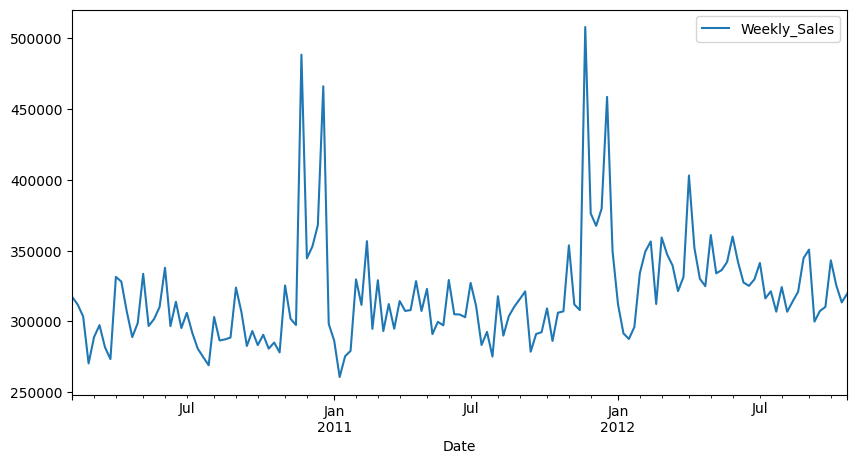

In [30]:
store_5.plot(figsize=(10,5))

In [31]:
print(store_5.head())
store_5.shape

            Weekly_Sales
Date                    
2010-02-05     317173.10
2010-02-12     311825.70
2010-02-19     303447.57
2010-02-26     270281.63
2010-03-05     288855.71


(143, 1)

**Decomposition of Store_5**

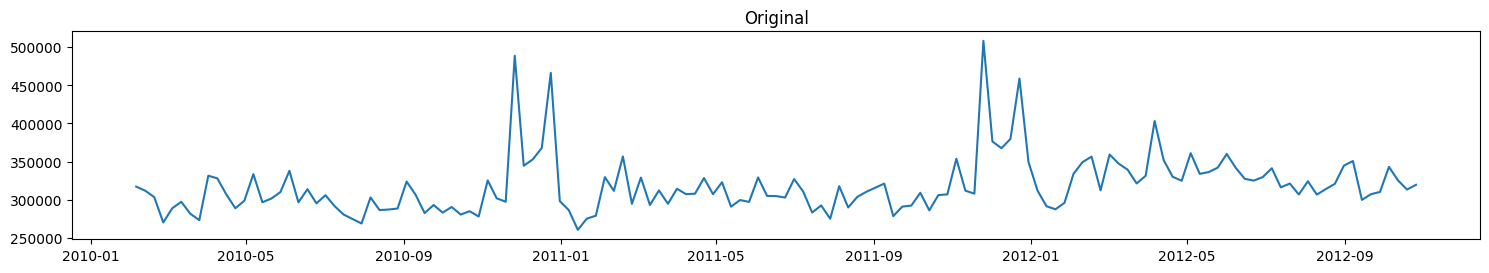

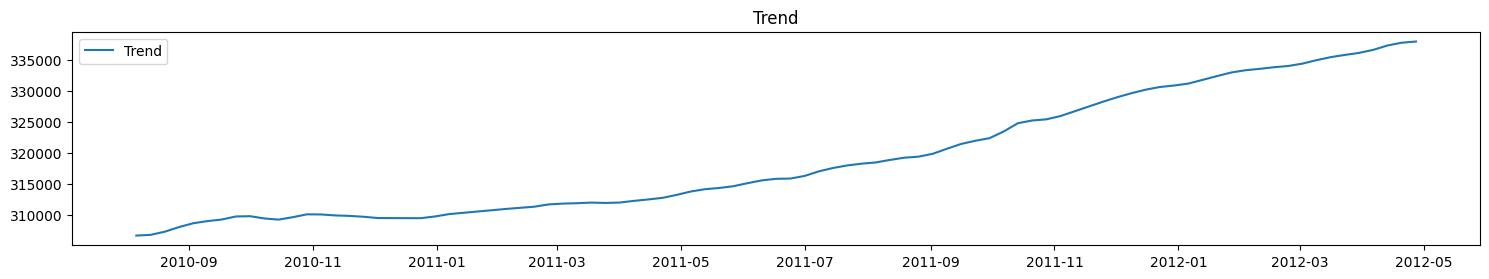

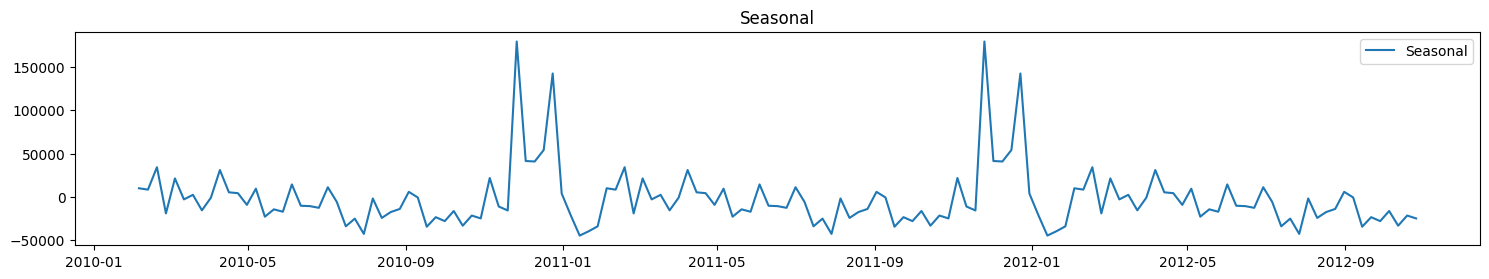

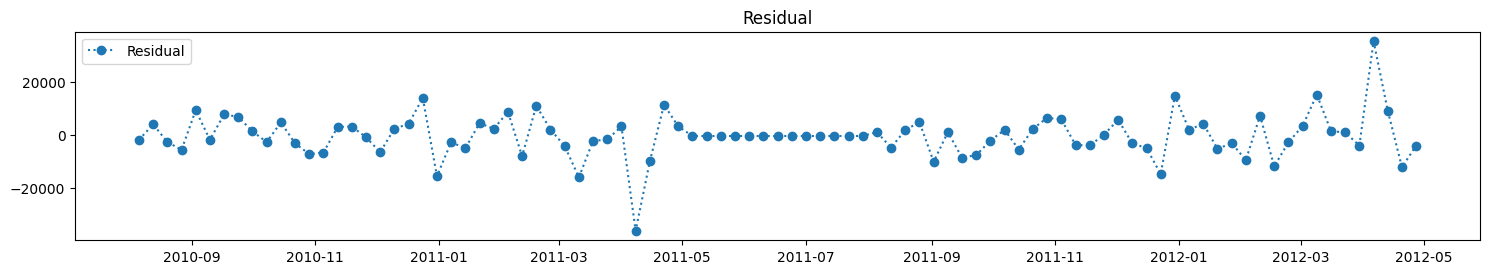

In [32]:
decompose_visual(store_5)

In [33]:
# adfuller_test
adf_test(store_5)
# kpss_test
kpss_test(store_5)

'ADF TEST' --> p_values :0.00043, Data is Stationary
'KPSS TEST' --> p_value :0.023698, Data is Not Stationary


# Making store_5 stationary

In [34]:
# using Log transformation and Storing in new variable s_5
s_5=np.log(store_5)
s_5=s_5.dropna()
s_5.head(10)

Weekly_Sales
Date                    
2010-02-05     12.667203
2010-02-12     12.650200
2010-02-19     12.622964
2010-02-26     12.507220
2010-03-05     12.573683
2010-03-12     12.602475
2010-03-19     12.548621
2010-03-26     12.518263
2010-04-02     12.711099
2010-04-09     12.700831

In [35]:
# checking for stationary after log transformation
adf_test(s_5)
kpss_test(s_5)

# since the data is still non stationary let's perform 1st order differencing
# 1st Order Differencing
s_5=s_5.diff().dropna()
print(s_5.shape)
print(s_5.head(10))

#checking for stationary after differencing
print("After Differencing :")
adf_test(s_5)
kpss_test(s_5)

'ADF TEST' --> p_values :0.00030, Data is Stationary
'KPSS TEST' --> p_value :0.014896, Data is Not Stationary
(142, 1)
            Weekly_Sales
Date                    
2010-02-12     -0.017003
2010-02-19     -0.027236
2010-02-26     -0.115744
2010-03-05      0.066463
2010-03-12      0.028793
2010-03-19     -0.053855
2010-03-26     -0.030358
2010-04-02      0.192836
2010-04-09     -0.010268
2010-04-16     -0.066689
After Differencing :
'ADF TEST' --> p_values :0.00000, Data is Stationary
'KPSS TEST' --> p_value :0.100000, Data is Stationary


<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result=kpss(store)


**Difference b/w non_stationary and stationary data**

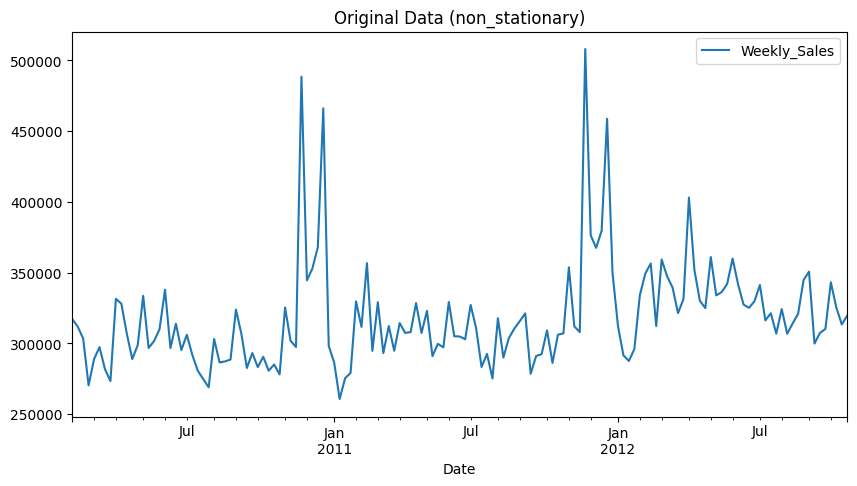

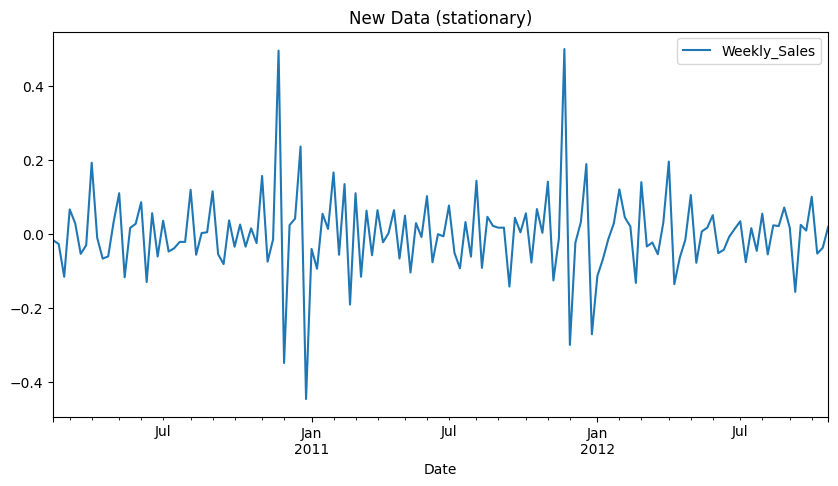

In [36]:
# let's Visulaize the s_5
# Orginal_data
store_5.plot(figsize=(10,5)),
plt.title("Original Data (non_stationary)")
plt.show()
# New_data
s_5.plot(figsize=(10,5))
plt.title("New Data (stationary)")
plt.show()

# as we can see trend and standard deviation are stablized from the data.

**ACF and PACF Check**

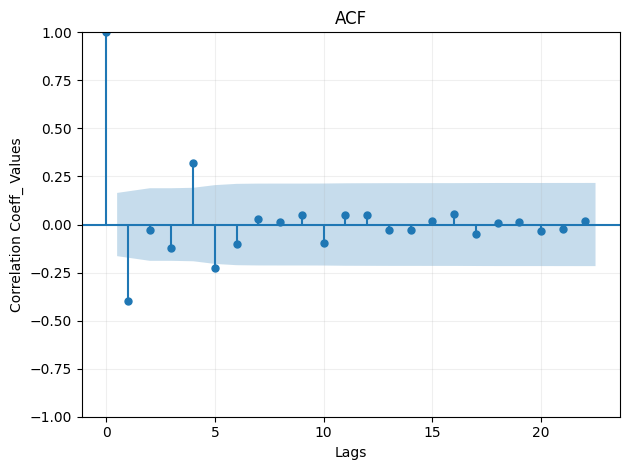

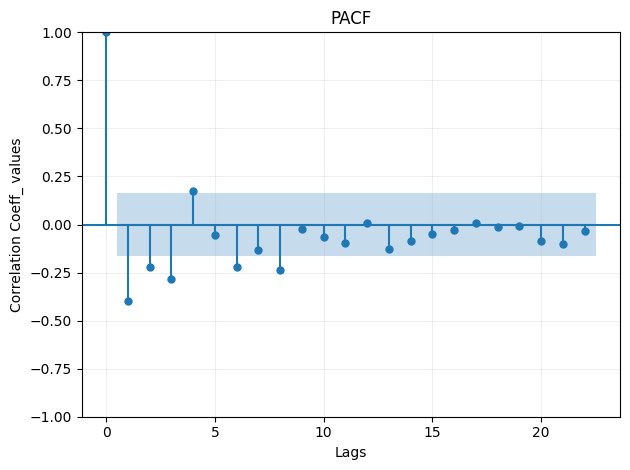

In [37]:
# as the data is stationary now let's move for ACF and PACF plots
acf_pacf_check(s_5)

# from the above ACF and PACF we have multiple values of p = [1,2,3,6,8] (lags)
# for q = [1,4] and now let's check the best order for our model.

In [38]:
s_5.shape

(142, 1)

**Random order ARIMA Model**

In [39]:
# let's take any random order such as (1,1,1) for our arima model and let's see the results

a_model=ARIMA(s_5,order=(1,1,1))
a_model=a_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


errors : 0.05539509487818544


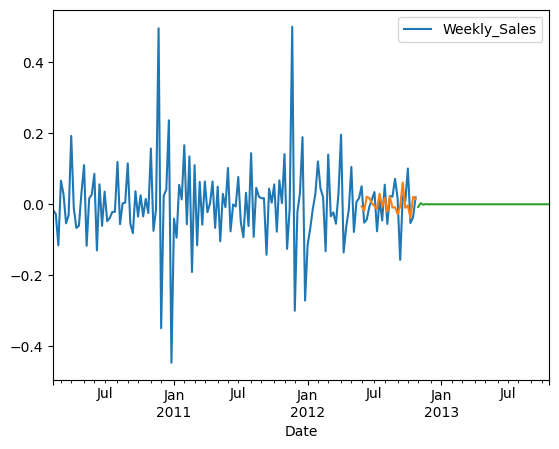

In [40]:
a_pred=a_model.predict(start=120,end=len(s_5)-1)
a_forecast=a_model.get_forecast(steps=52)
errors=np.sqrt(mean_squared_error(s_5[120:],a_pred))
print(f"errors : {errors}")

s_5.plot()
a_pred.plot()
a_forecast.predicted_mean.plot()
plt.show()

**finding best order**

In [41]:
# let's find the best values for p,d,q  ::: p = [1,2,3,6,8] & q=[1,4]

p=[1,2,3,6,8]
d=[0,1,2]
q=[1,4]
find_best_order(s_5,p,d,q)   # will print the order at last

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

               RMSE
(3, 1, 1)  0.046764
(2, 0, 4)  0.047250
(3, 0, 1)  0.047908
(3, 0, 4)  0.048130
(6, 2, 4)  0.048206
(1, 0, 4)  0.048597
(2, 1, 4)  0.048627
(6, 1, 4)  0.048739
(8, 2, 4)  0.049038
(6, 1, 1)  0.049249


# as the order=(3,1,1) have the least RMSE value let's take this order and build the model

**ARIMA Model on best order**

In [42]:
a_model=ARIMA(s_5,order=(3,1,1))
a_model=a_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


errors : 0.046764327878939235


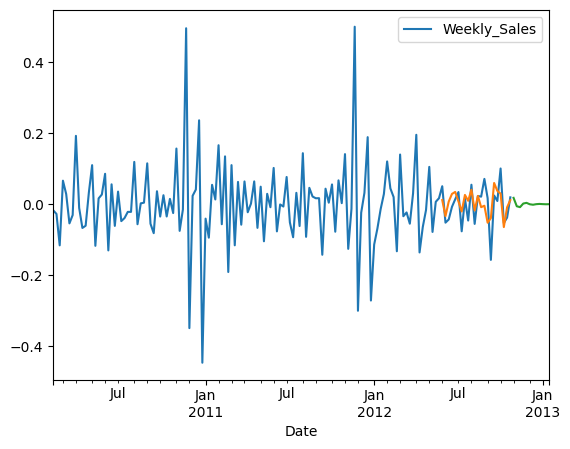

In [43]:
a_pred=a_model.predict(start=120,end=len(s_5)-1)
a_forecast=a_model.get_forecast(steps=12)
errors=np.sqrt(mean_squared_error(s_5[120:],a_pred))
print(f"errors : {errors}")

s_5.plot()
a_pred.plot()
a_forecast.predicted_mean.plot()
plt.show()

# due to seasonality present in data ARIMA model is under performing let's try SARIMAX

In [44]:
# SARIMAX_MODEL

s_model=SARIMAX(s_5,order=(3,1,1),seasonal_order=(3,1,1,52))
s_model=s_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# SARIMAX Forecast for New_data s_5

errors : 0.035899150920852496


<Figure size 1000x800 with 0 Axes>

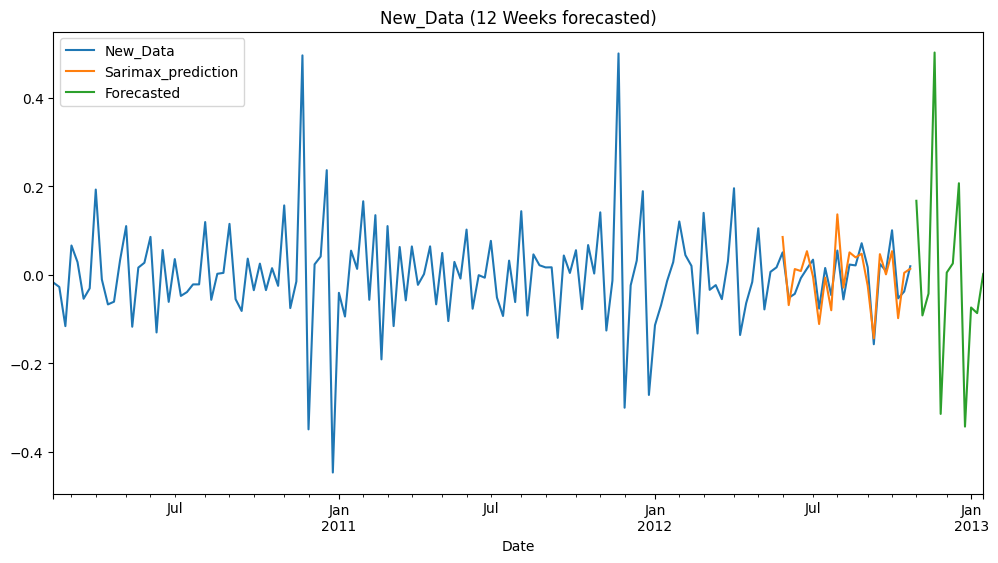

In [45]:
# Let's check the model accuracy.
s_pred=s_model.predict(start=120,end=len(s_5)-1)
errors_s=np.sqrt(mean_squared_error(s_5[120:],s_pred))
print(f"errors : {errors_s}")

# Forecasting for 12 Weeks
s_forecast=s_model.get_forecast(steps=12)


# Visualizations
labels=['New_Data','Sarimax_prediction','Forecasted']
plt.figure(figsize=(10,8))
s_5.plot(label="New_Data",figsize=(12,6))
s_pred.plot()
s_forecast.predicted_mean.plot()
plt.legend(labels,loc='upper left')
plt.title("New_Data (12 Weeks forecasted)")
plt.show()

# SARIMAX model on Store_5 Original Data

In [46]:
s2_model=SARIMAX(store_5,order=(3,1,1),seasonal_order=(3,1,1,52))
s2_model=s2_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


# Store_5 (12 weeks forecast)

errors : 11071.341863850115


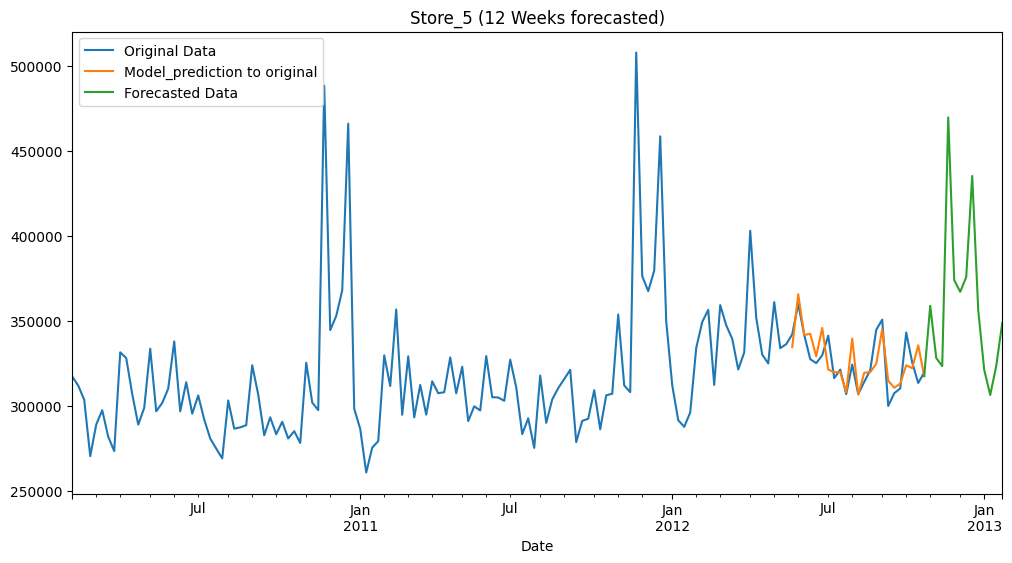

In [47]:
# Let's check the model accuracy.
s2_pred=s2_model.predict(start=120,end=len(store_5)-1)
errors_s2=np.sqrt(mean_squared_error(store_5[120:],s2_pred))
print(f"errors : {errors_s2}")

# Forecasting for 12 Weeks
s2_forecast=s2_model.get_forecast(steps=12)
# as the get_forecast will give the prediction from 12 week after the 26-10-2012 so we take 12 weeks from 26-10-2012
# Forecasting from 26-10-2012 to 12 weeks ahead.
s2_forecast_5=s2_model.predict(start=len(store_5)-1,end=len(store_5)+12)


# Visualizations
labels_5=['Original Data','Model_prediction to original','Forecasted Data']
store_5.plot(figsize=(12,6))
s2_pred.plot()
s2_forecast_5.plot()
plt.legend(labels_5,loc='upper left')
plt.title("Store_5 (12 Weeks forecasted)")
plt.show()

# **Store_14**

<Axes: xlabel='Date'>

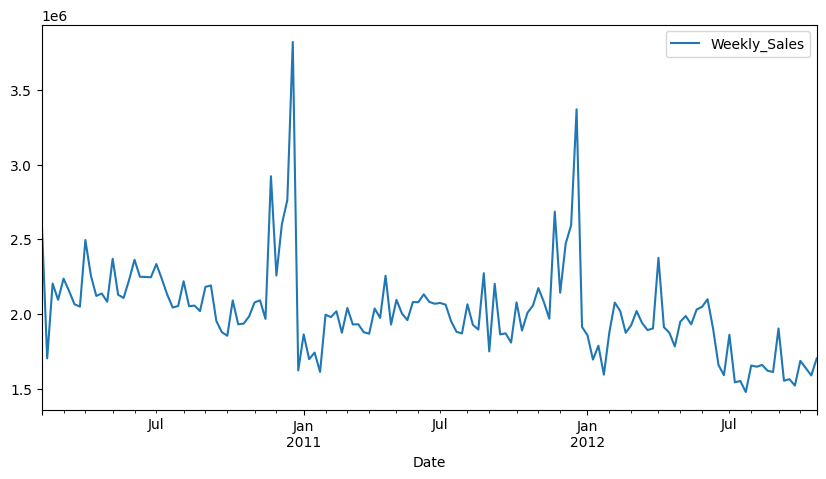

In [48]:
store_14.plot(figsize=(10,5))

In [49]:
print(store_14.head())
store_14.shape

            Weekly_Sales
Date                    
2010-02-05    2623469.95
2010-02-12    1704218.84
2010-02-19    2204556.70
2010-02-26    2095591.63
2010-03-05    2237544.75


(143, 1)

# Decompose

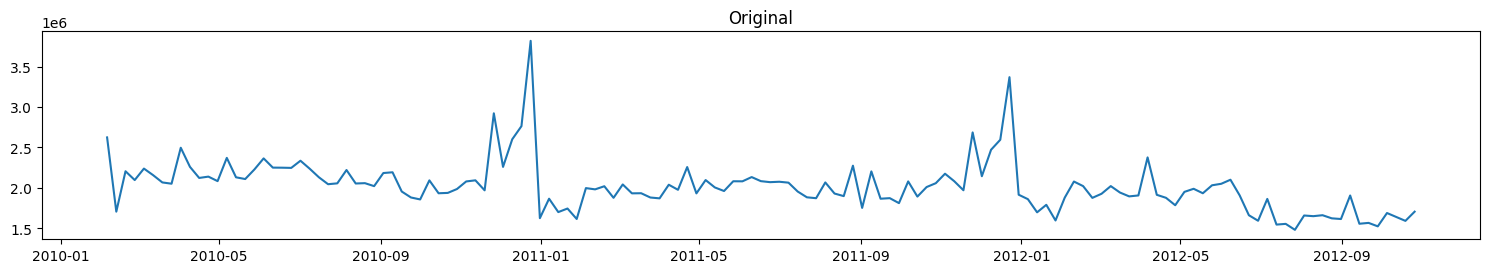

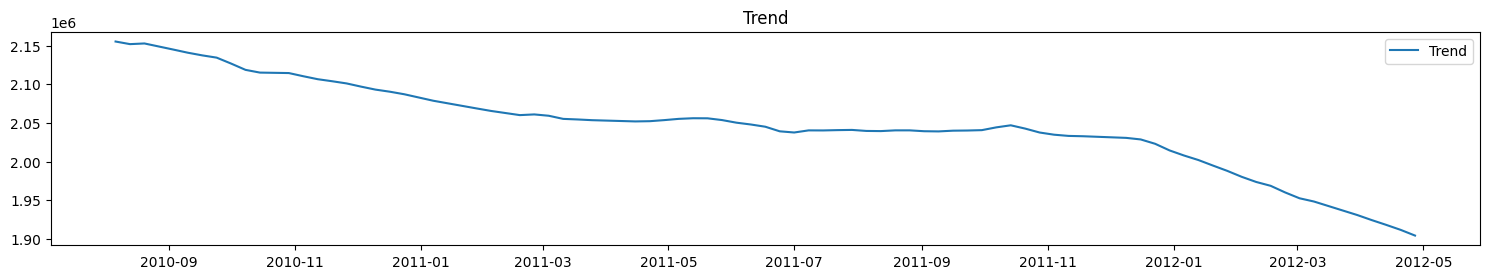

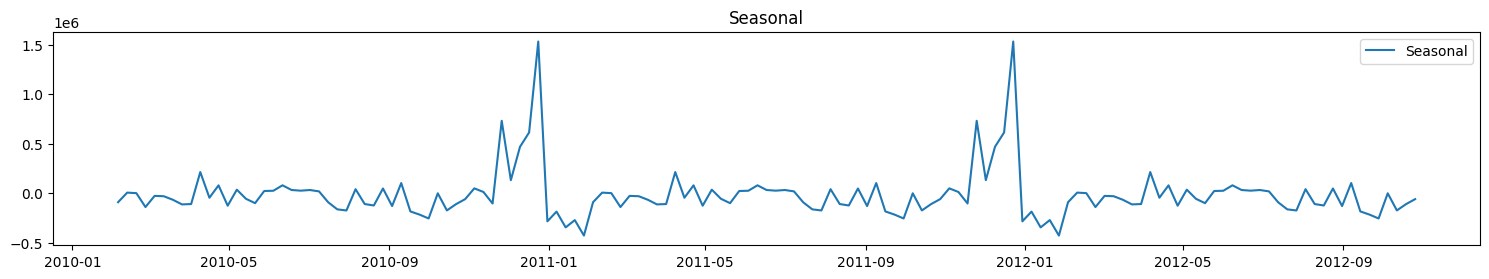

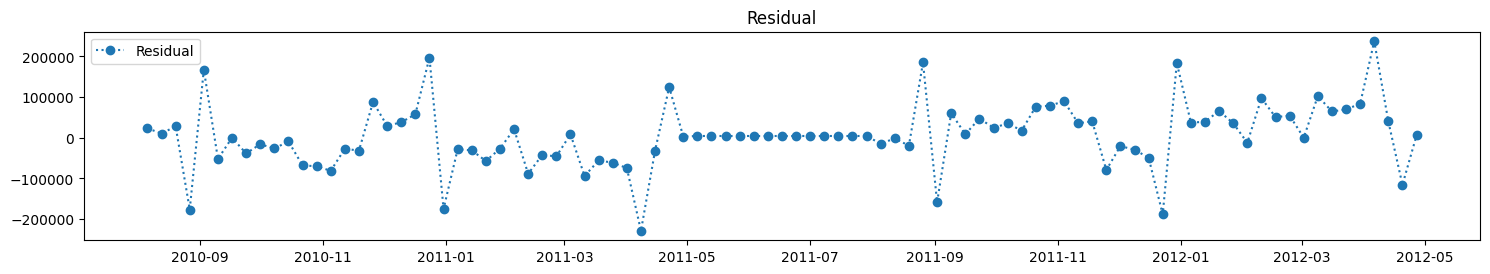

In [50]:
decompose_visual(store_14)

# Checking for Stationarity

In [51]:
# adfuller_test
adf_test(store_14)
# kpss_test
kpss_test(store_14)

'ADF TEST' --> p_values :0.06787, Data is not Stationary
'KPSS TEST' --> p_value :0.010000, Data is Not Stationary


<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_result=kpss(store)


**Making the data stationary**

In [52]:
# as the data is not stationary let's stabilize the data

# Log transformation
s_14=np.log(store_14)
print(s_14.head())

# checking for stationarity
print(" After Log Transformation")
adf_test(s_14)
kpss_test(s_14)

# as log transformation is not able to get data stationary
#  1st Order Differencing
s_14=s_14.diff().dropna()
print(s_14.head())

# checking for stationarity
print("After Differencing :")
adf_test(s_14)
kpss_test(s_14)

            Weekly_Sales
Date                    
2010-02-05     14.780008
2010-02-12     14.348617
2010-02-19     14.606037
2010-02-26     14.555346
2010-03-05     14.620890
 After Log Transformation
'ADF TEST' --> p_values :0.14652, Data is not Stationary
'KPSS TEST' --> p_value :0.010000, Data is Not Stationary
            Weekly_Sales
Date                    
2010-02-12     -0.431391
2010-02-19      0.257420
2010-02-26     -0.050691
2010-03-05      0.065543
2010-03-12     -0.037108
After Differencing :
'ADF TEST' --> p_values :0.00000, Data is Stationary
'KPSS TEST' --> p_value :0.100000, Data is Stationary


<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_result=kpss(store)
<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result=kpss(store)


**Visualization non-stationary Vs. Stationary**

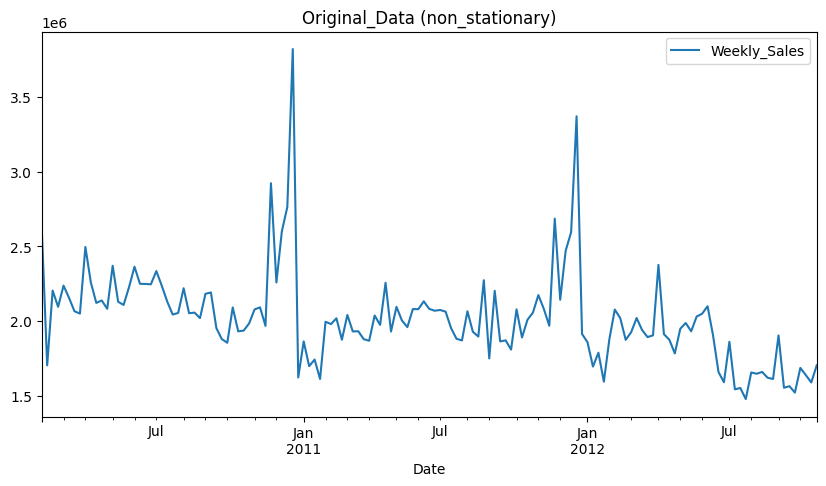

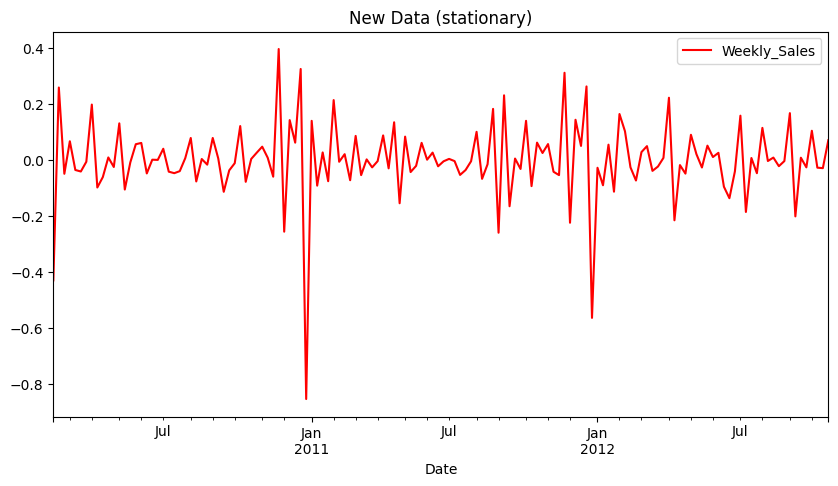

In [53]:
# Let's Visualize the original data and new data after stationarity
# Orginal data
store_14.plot(figsize=(10,5))
plt.title("Original_Data (non_stationary)")
plt.show()

# New data
s_14.plot(figsize=(10,5),color='red')
plt.title("New Data (stationary)")
plt.show()

# as we can see trend and standard deviation are stablized from the data.

**ACF and PACF Check**

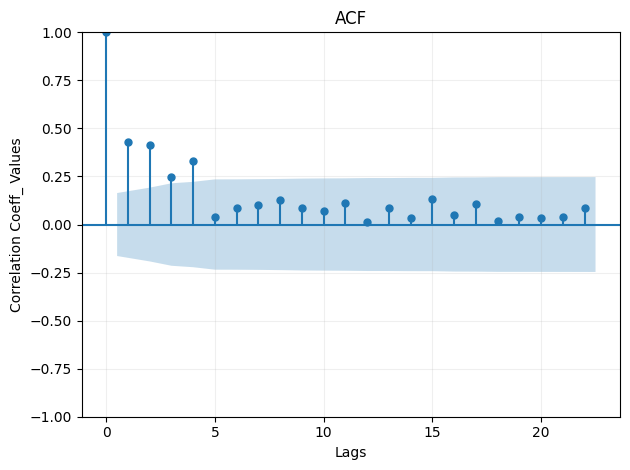

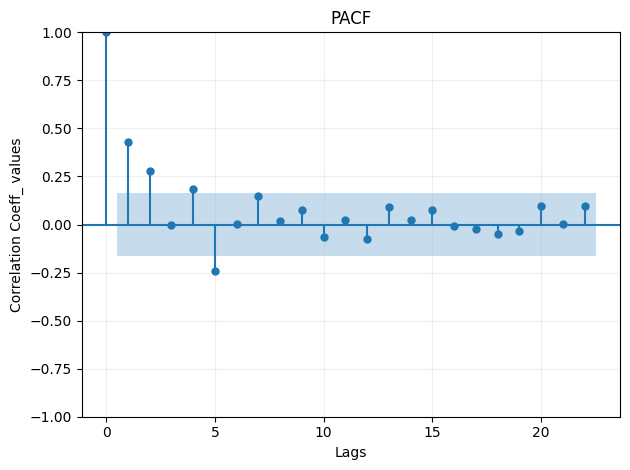

In [54]:
# Let's check the ACF and PACF
acf_pacf_check(store_14)

# Insights - as we can see the lag values for p = [1,2,5] and q = [1,2,3,4]. Now let's find the best order for the model.

**ARIMA Model on random order**

In [55]:
# let's make an ARIMA model from random order (2,1,3)

a_model_14=ARIMA(s_14,order=(2,1,3))
a_model_14=a_model_14.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Errors : 0.0913


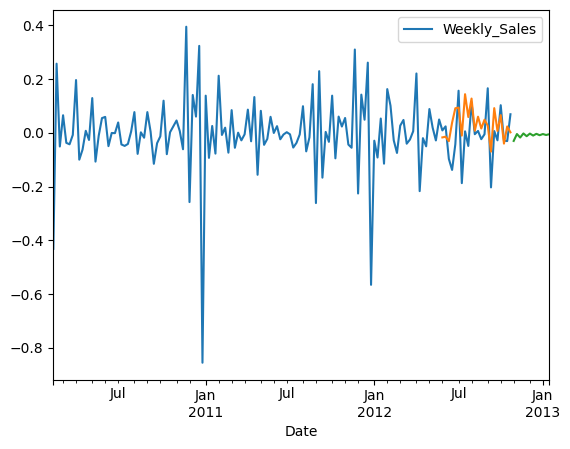

In [56]:
# let's predict
a_pred_14=a_model_14.predict(start=120,end=len(s_14)-1)
a_forecast_14=a_model_14.get_forecast(steps=12)
error_14=np.sqrt(mean_squared_error(s_14[120:],a_pred_14))
print(f" Errors : {error_14:.4f}")

# visualize
s_14.plot()
a_pred_14.plot()
a_forecast_14.predicted_mean.plot()
plt.show()

**finding best order**

In [57]:
# let's find the best order fits for our model for less error (p = [1,2,5] and q = [1,2,3,4].)

p=[1,2,5]
d=[0,1,2]
q=[1,2,3,4]
find_best_order(s_14,p,d,q)  # will print the best order at last

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

               RMSE
(5, 1, 2)  0.080496
(5, 1, 4)  0.081971
(5, 1, 3)  0.082427
(2, 1, 4)  0.084683
(5, 2, 4)  0.084905
(5, 0, 2)  0.085109
(1, 0, 2)  0.085651
(5, 1, 1)  0.085673
(1, 1, 3)  0.086148
(1, 2, 3)  0.086208


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#  best order of the model is (5,1,2) with least RMSE value

**ARIMA Model on best order values**

In [58]:
# best order we get is (5,1,2)
# ARIMA MODEL
a_model_14=ARIMA(s_14,order=(5,1,2))
a_model_14=a_model_14.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


**Prediction and Forecasting of ARIMA Model**

 Errors : 0.0805


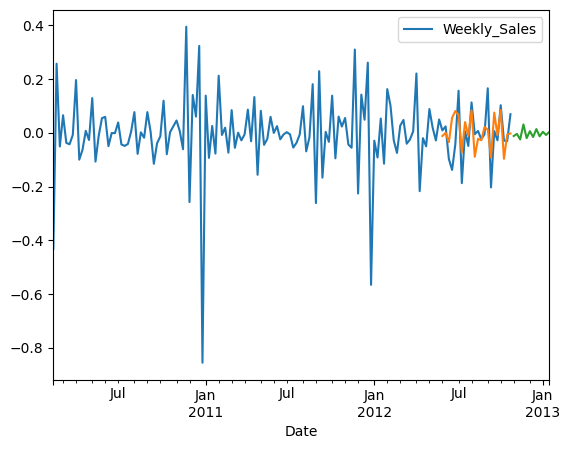

In [59]:
# let's predict
a_pred_14=a_model_14.predict(start=120,end=len(s_14)-1)
a_forecast_14=a_model_14.get_forecast(steps=12)
error_14=np.sqrt(mean_squared_error(s_14[120:],a_pred_14))
print(f" Errors : {error_14:.4f}")

# visualize
s_14.plot()
a_pred_14.plot()
a_forecast_14.predicted_mean.plot()
plt.show()

**SARIMAX Model on stationary data**

In [60]:
# due to seasonality our model is not performing roburst

# SARIMAX
s_model_14=SARIMAX(s_14,order=(5,1,2),seasonal_order=(5,1,2,52))
s_model_14=s_model_14.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Errors : 0.0746


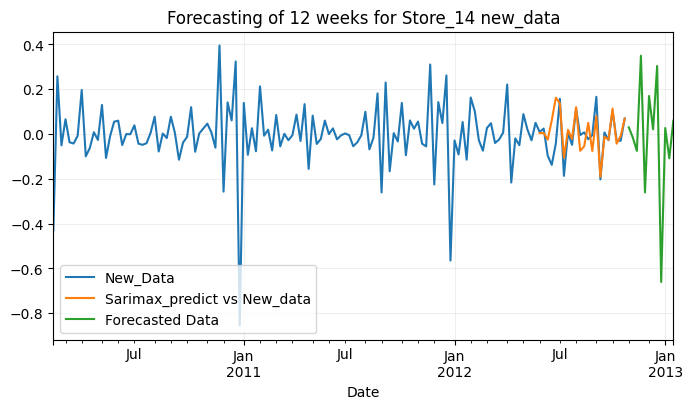

In [61]:
# let's predict
s_pred_14=s_model_14.predict(start=120,end=len(s_14)-1)
s_forecast_14=s_model_14.get_forecast(steps=12)
s_error_14=np.sqrt(mean_squared_error(s_14[120:],s_pred_14))
print(f" Errors : {s_error_14:.4f}")

# visualize
labels=['New_Data','Sarimax_predict vs New_data','Forecasted Data']
s_14.plot(figsize=(8,4))
s_pred_14.plot()
s_forecast_14.predicted_mean.plot()
plt.title("Forecasting of 12 weeks for Store_14 new_data")
plt.grid(alpha=0.20)
plt.legend(labels,loc='lower left')
plt.show()

# **SARIMAX Model**

In [62]:
s2_model_14=SARIMAX(store_14,order=(5,1,2),seasonal_order=(5,1,2,52))
s2_model_14=s2_model_14.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Store_14 forecasting for 12 Weeks

 Errors : 116987.6622


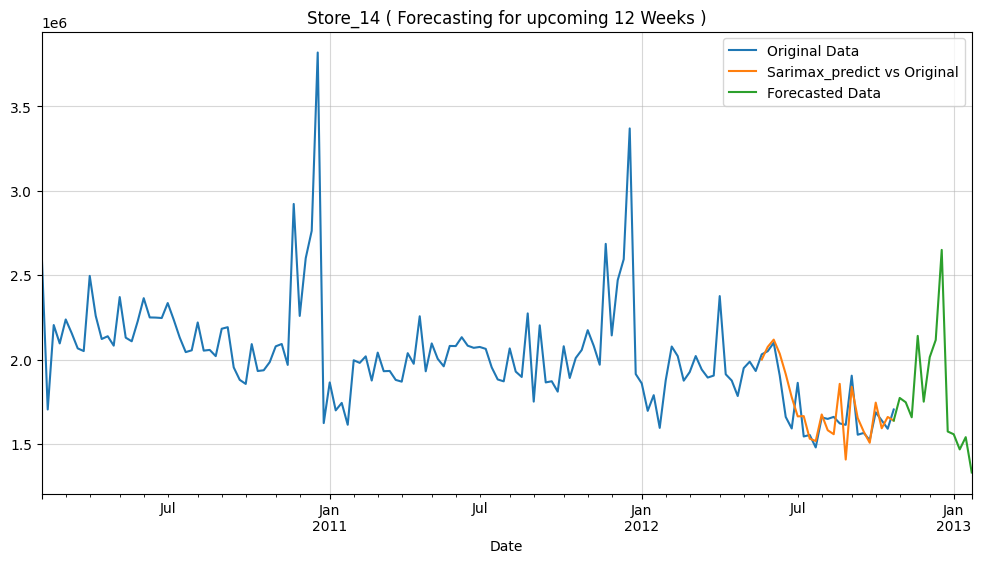

In [63]:
# let's predict
s2_pred_14=s2_model_14.predict(start=120,end=len(store_14)-1)
s2_error_14=np.sqrt(mean_squared_error(store_14[120:],s2_pred_14))
print(f" Errors : {s2_error_14:.4f}")

# forecasting for 12 Weeks
s2_forecast_14=s2_model_14.get_forecast(steps=12)

# as the get_forecast will give the prediction from 12 week after the 26-10-2012 so we take 12 weeks from 26-10-2012
# Forecasting from 26-10-2012 to 12 weeks ahead.
s2_forecast_14=s2_model_14.predict(start=len(store_14)-1,end=len(store_14)+12)

# visualization
labels_14=['Original Data','Sarimax_predict vs Original','Forecasted Data']
store_14.plot(figsize=(12,6))
s2_pred_14.plot()
s2_forecast_14.plot()
plt.title("Store_14 ( Forecasting for upcoming 12 Weeks )")
plt.legend(labels_14,loc='upper right')
plt.grid(alpha=0.50)
plt.show()

# Store_10

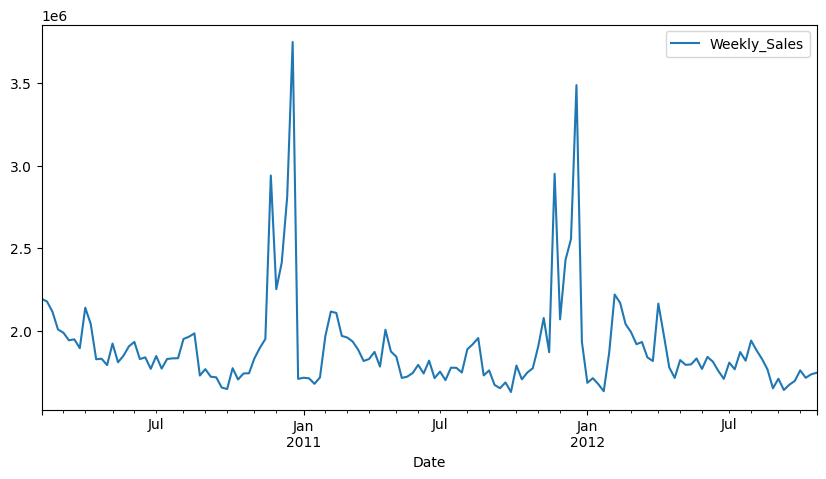

In [64]:
store_10.plot(figsize=(10,5))
plt.show()

In [65]:
print(store_10.head())
store_10.shape

            Weekly_Sales
Date                    
2010-02-05    2193048.75
2010-02-12    2176028.52
2010-02-19    2113432.58
2010-02-26    2006774.96
2010-03-05    1987090.09


(143, 1)

**Decomposition of store_10**

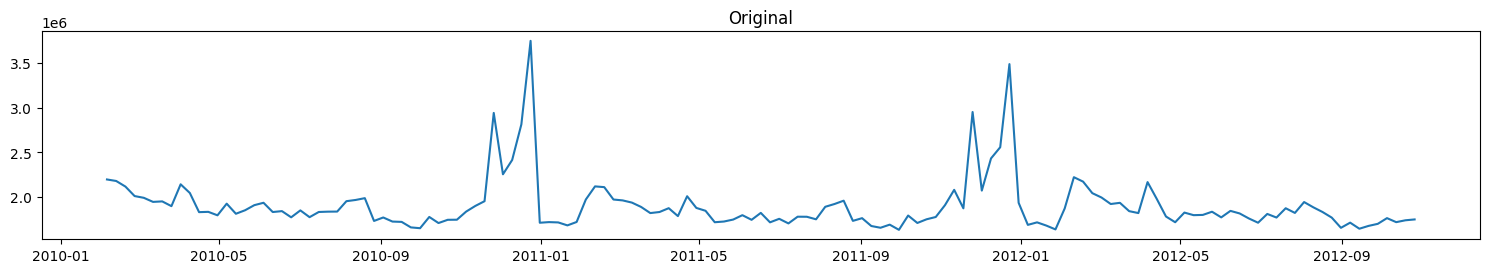

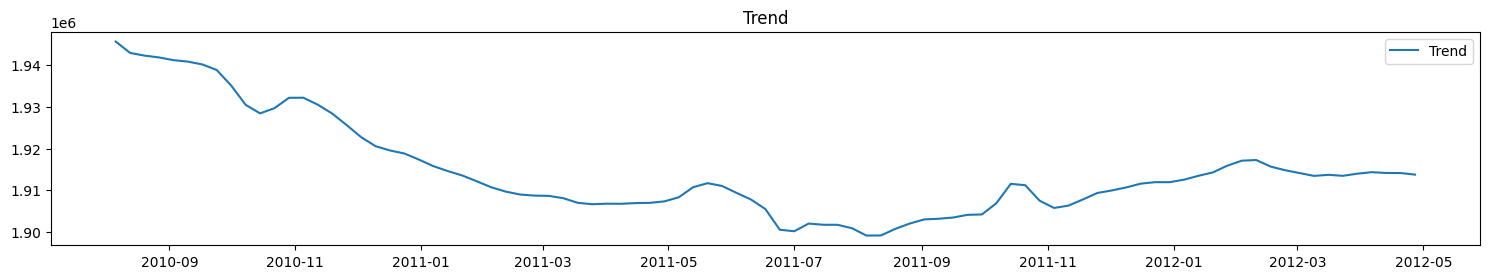

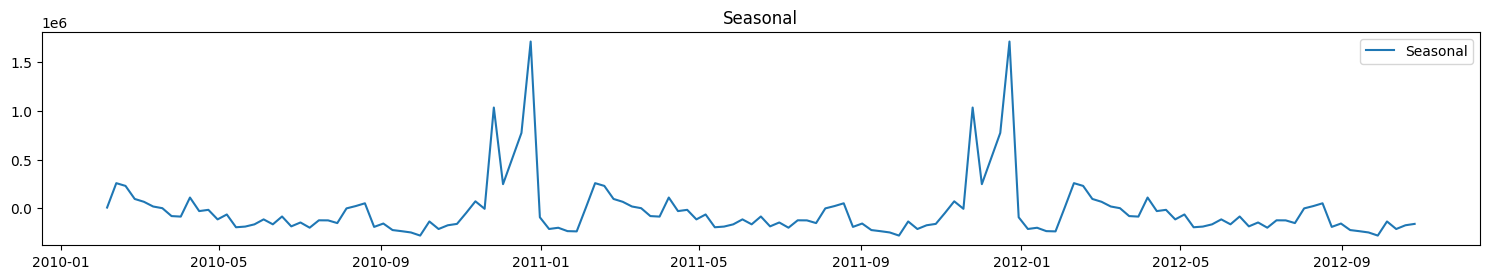

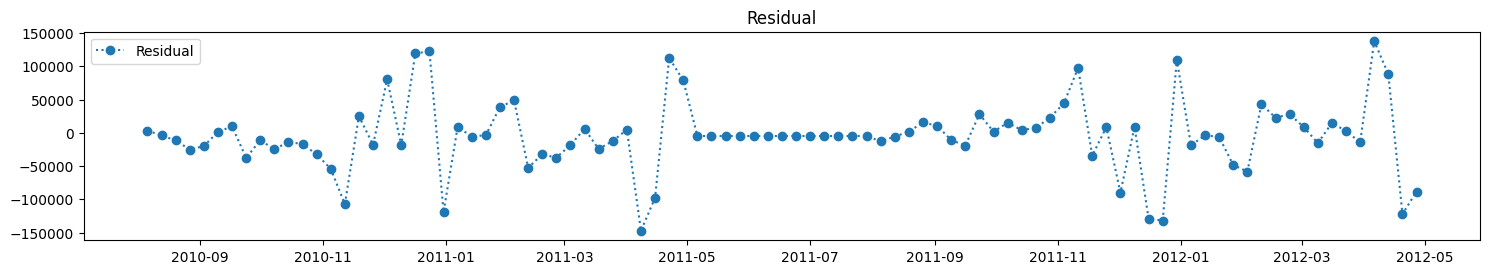

In [66]:
decompose_visual(store_10)

# Checking for Stationarity

In [67]:
adf_test(store_10)
kpss_test(store_10)

'ADF TEST' --> p_values :0.00001, Data is Stationary
'KPSS TEST' --> p_value :0.100000, Data is Stationary


<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result=kpss(store)


# As data is stationary let's try seeing ACF and PACF

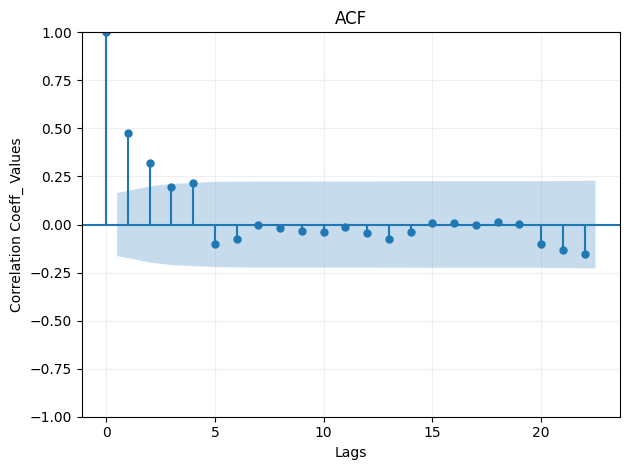

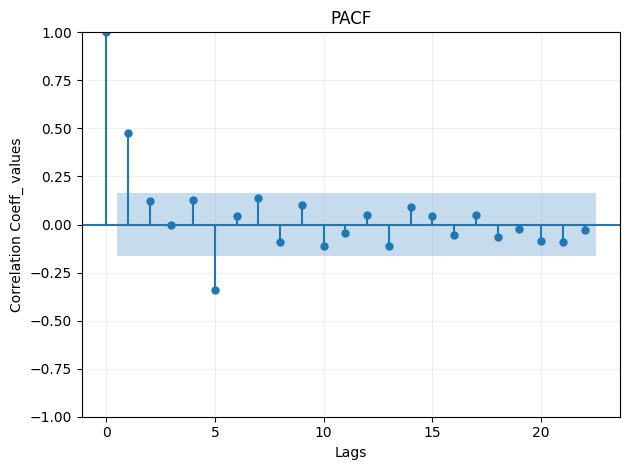

In [68]:
# ACF and PACF for store_10

acf_pacf_check(store_10)

In [69]:
# from ACF and PACF we have lag values

p = [1,5]
d = [0,1,2]
q = [1,5]

# let's find the best order for store_10
find_best_order(store_10,p,d,q)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

                   RMSE
(1, 2, 1)  64233.855017
(5, 2, 1)  68589.284668
(1, 1, 5)  69008.341350
(5, 1, 5)  69503.539604
(1, 2, 5)  72548.243365
(5, 2, 5)  72677.176463
(5, 1, 1)  78695.822835
(1, 1, 1)  78957.368837
(5, 0, 5)  79172.484009
(1, 0, 5)  80220.910020


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# best order value for low rmse is (1,2,1)

**ARIMA MODEL**

In [70]:
# building ARIMA model as order (1,2,1)

a_model_10=ARIMA(store_10,order=(1,2,1))
a_model_10=a_model_10.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


**Visualization of ARIMA**

Error : 64233.855017285816


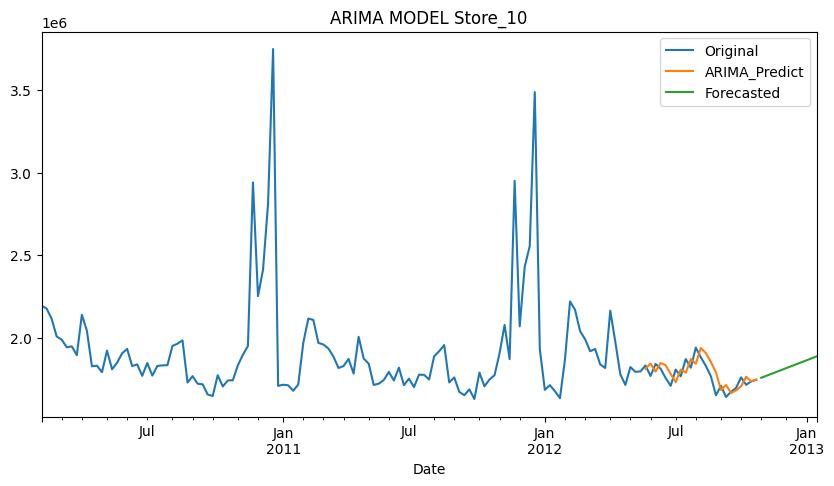

In [71]:
# prediction and accuarcy check
a_pred_10=a_model_10.predict(start=120,end=len(store_10)-1)
error_10=np.sqrt(mean_squared_error(store_10[120:],a_pred_10))
print(f"Error : {error_10}")

# forecasting for next 12 weeks
a_forecast_10=a_model_10.get_forecast(steps=12)

# visualize
labels=['Original','ARIMA_Predict','Forecasted']
store_10.plot(figsize=(10,5))
a_pred_10.plot()
a_forecast_10.predicted_mean.plot()
plt.title("ARIMA MODEL Store_10")
plt.legend(labels,loc='upper right')
plt.show()

# **SARIMAX Model**

In [72]:
# SARIMAX

s_model_10=SARIMAX(store_10,order=(1,2,1),seasonal_order=(1,2,1,52))
s_model_10=s_model_10.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


# **SARIMAX MODEL Forecasting of Store_10 for next 12 weeks**

Error : 97827.90828369863


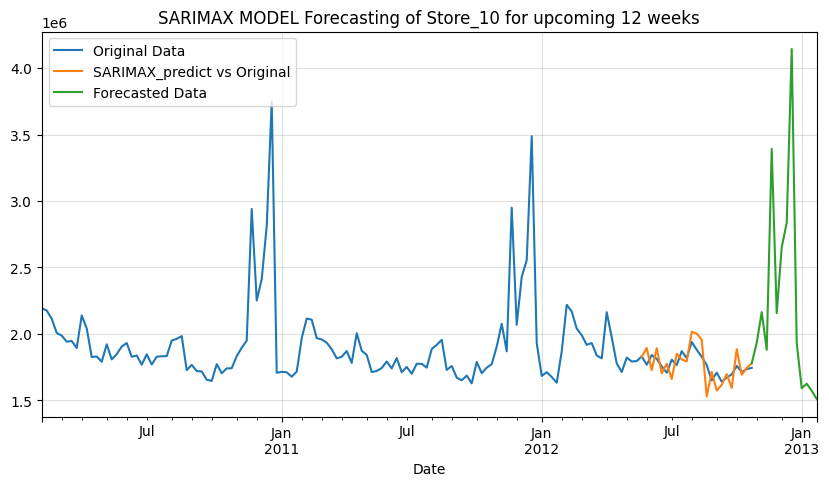

In [73]:
# prediction and accuarcy check
s_pred_10=s_model_10.predict(start=120,end=len(store_10)-1)
s_error_10=np.sqrt(mean_squared_error(store_10[120:],s_pred_10))
print(f"Error : {s_error_10}")

# forecasting for 12 weeks
s_forecast_10=s_model_10.get_forecast(steps=12)

# as the get_forecast will give the prediction from 12 week after the 26-10-2012 so we take 12 weeks from 26-10-2012
# Forecasting from 26-10-2012 to 12 weeks ahead.
s_forecast_10=s_model_10.predict(start=len(store_10)-1,end=len(store_10)+12)

# visualization
labels_10=['Original Data','SARIMAX_predict vs Original','Forecasted Data']
store_10.plot(figsize=(10,5))
s_pred_10.plot()
s_forecast_10.plot()
plt.title("SARIMAX MODEL Forecasting of Store_10 for upcoming 12 weeks")
plt.legend(labels_10,loc='upper left')
plt.grid(alpha=0.40)
plt.show()

# Store_20

<Axes: xlabel='Date'>

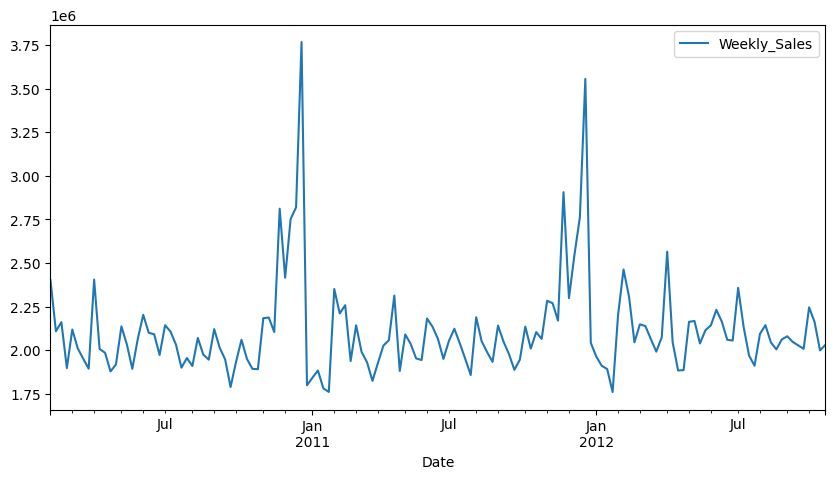

In [74]:
store_20.plot(figsize=(10,5))

In [75]:
print(store_20.head())
store_20.shape

            Weekly_Sales
Date                    
2010-02-05    2401395.47
2010-02-12    2109107.90
2010-02-19    2161549.76
2010-02-26    1898193.95
2010-03-05    2119213.72


(143, 1)

**Decompostion of Store_20**

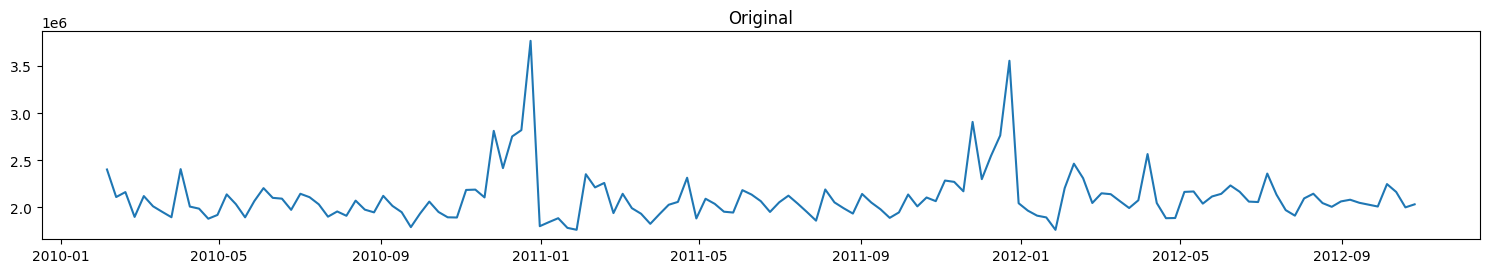

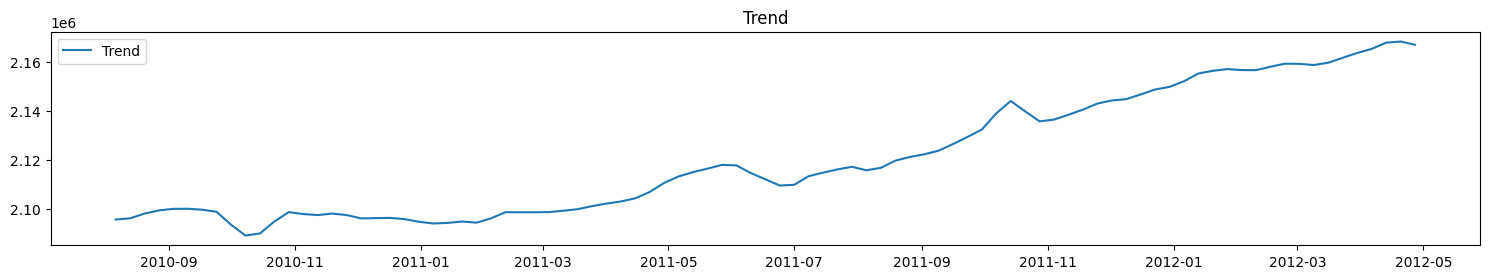

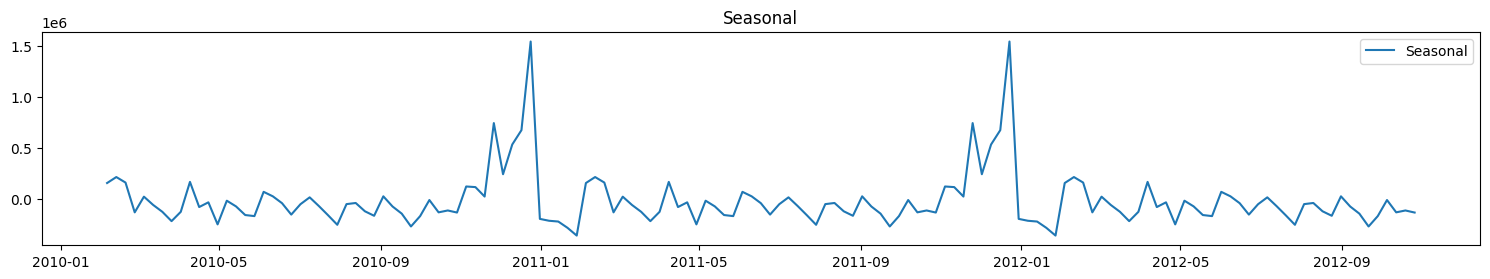

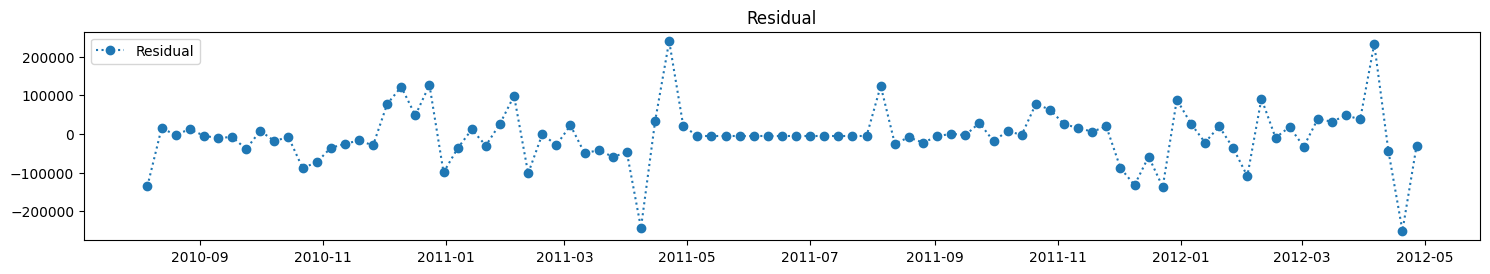

In [76]:
decompose_visual(store_20)

# Checking for Stationarity

In [77]:
# adfuller test
adf_test(store_20)
# kpss test
kpss_test(store_20)

'ADF TEST' --> p_values :0.00000, Data is Stationary
'KPSS TEST' --> p_value :0.100000, Data is Stationary


<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result=kpss(store)


**ACF and PACF Check**

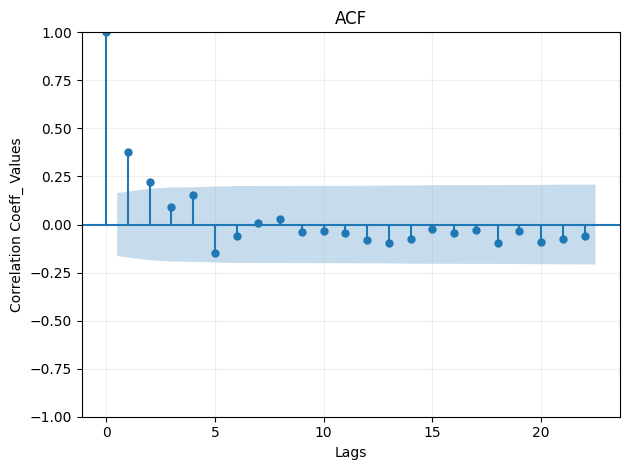

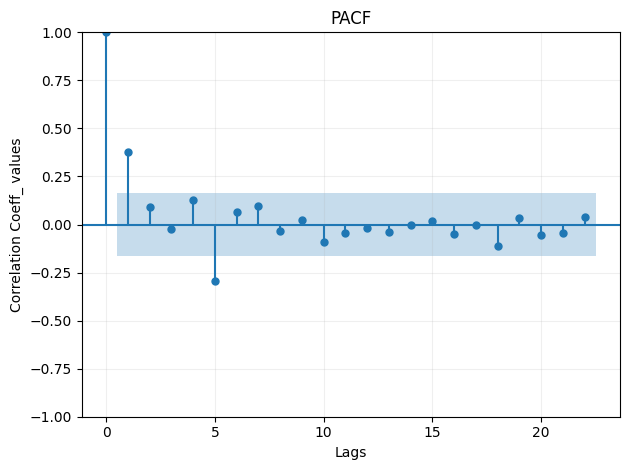

In [78]:
# as data is stationary let's move to ACF and PACF

acf_pacf_check(store_20)

**finding best order**

In [79]:
# from ACF and PACF graph the lag values for p and q are :--
p=[1,5]
d=[0,1,2]
q=[1,2]

# finding best_order value for p,d,q
find_best_order(store_20,p,d,q)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

                    RMSE
(1, 0, 2)   93951.089502
(5, 0, 1)   98741.865808
(1, 0, 1)  100282.133701
(5, 1, 1)  100643.690294
(1, 1, 1)  100973.212075
(5, 1, 2)  101301.920645
(5, 0, 2)  103884.686509
(5, 2, 2)  104529.708262
(5, 2, 1)  109585.781483
(1, 1, 2)  114069.640156


**best order and building an ARIMA MODEL**

In [80]:
# best order (1,0,2) for which we have less rmse values

# ARIMA model for store_20 by taking an order of (1,0,2) as the values of p,d,q

a_model_20=ARIMA(store_20,order=(1,0,2))
a_model_20=a_model_20.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


# Predictions and Visualization of ARIMA MODEL for store_20

Error : 93951.08950159686


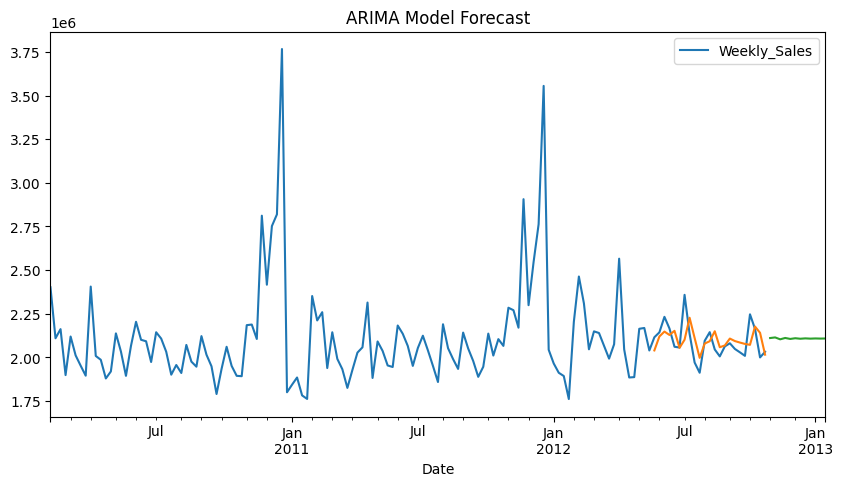

In [81]:
# prediction and accuracy check : -
a_pred_20=a_model_20.predict(start=120,end=len(store_20)-1)
error_20=np.sqrt(mean_squared_error(store_20[120:],a_pred_20))
print(f"Error : {error_20}")

# forecast for next 12 weeks
a_forecast_20=a_model_20.get_forecast(steps=12)

# visualization of forecast
store_20.plot(figsize=(10,5))
a_pred_20.plot()
a_forecast_20.predicted_mean.plot()
plt.title("ARIMA Model Forecast")
plt.show()

# SARIMAX Model

In [82]:
# SARIMAX

s_model_20=SARIMAX(store_20,order=(1,0,2),seasonal_order=(1,0,2,52))
s_model_20=s_model_20.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


# **SARIMAX Model Forecasting of Store_20 for upcoming 12 Weeks**

Error : 78857.98933277765


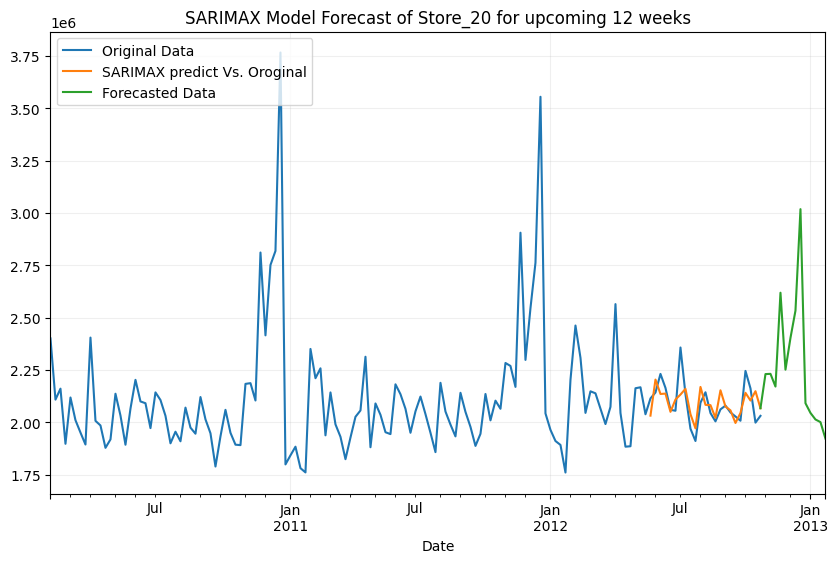

In [83]:
# Prediction and Accuracy Check : ---
s_pred_20=s_model_20.predict(start=120,end=len(store_20)-1)
s_error_20=np.sqrt(mean_squared_error(store_20[120:],s_pred_20))
print(f"Error : {s_error_20}")

#forcasting for 12 weeks
s_forecast_20=s_model_20.get_forecast(steps=12)

# as the get_forecast will give the prediction from 12 week after the 26-10-2012 so we take 12 weeks from 26-10-2012
# Forecasting from 26-10-2012 to 12 weeks ahead.
s_forecast_20=s_model_20.predict(start=len(store_20)-1,end=len(store_20)+12)

# Visualization of Forecast
labels_20=['Original Data','SARIMAX predict Vs. Oroginal','Forecasted Data']
store_20.plot(figsize=(10,6))
s_pred_20.plot()
s_forecast_20.plot()
plt.title("SARIMAX Model Forecast of Store_20 for upcoming 12 weeks")
plt.legend(labels_20,loc='upper left')
plt.grid(alpha=0.20)
plt.show()

# Store_45

<Axes: xlabel='Date'>

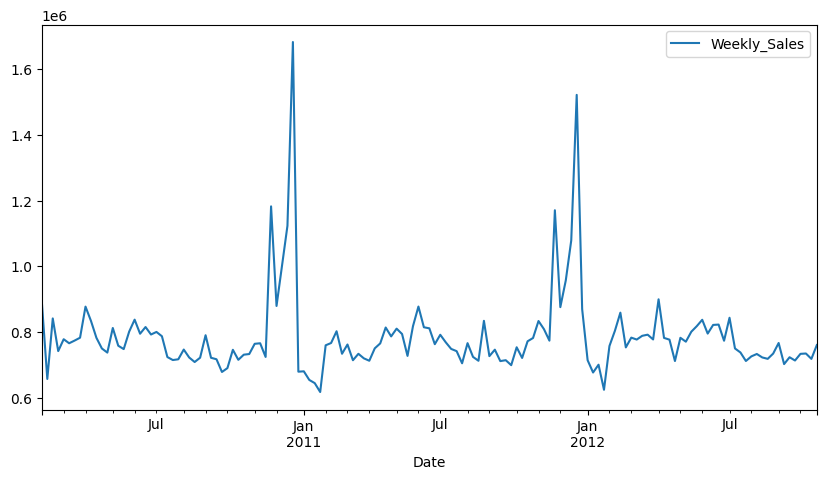

In [84]:
store_45.plot(figsize=(10,5))

In [85]:
print(store_45.head())
store_45.shape

            Weekly_Sales
Date                    
2010-02-05     890689.51
2010-02-12     656988.64
2010-02-19     841264.04
2010-02-26     741891.65
2010-03-05     777951.22


(143, 1)

**Decomposition of store_45**

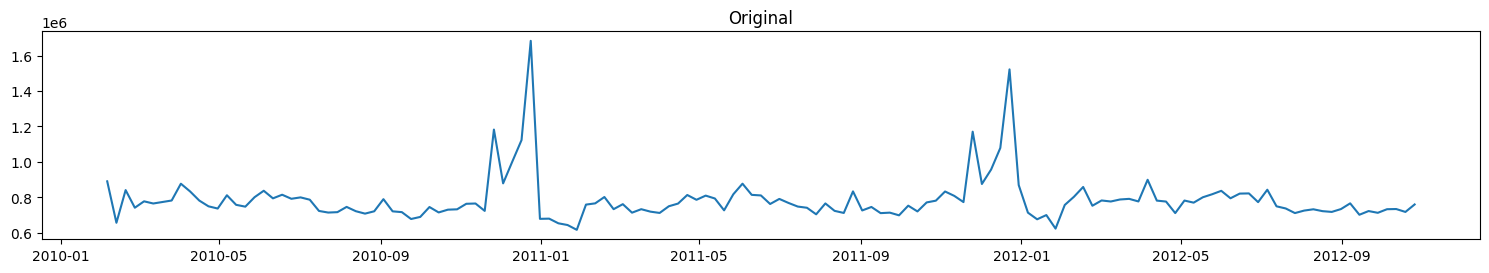

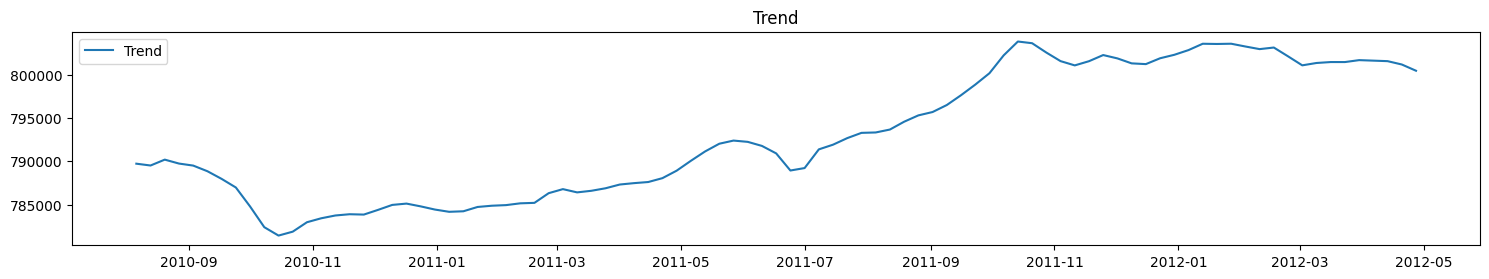

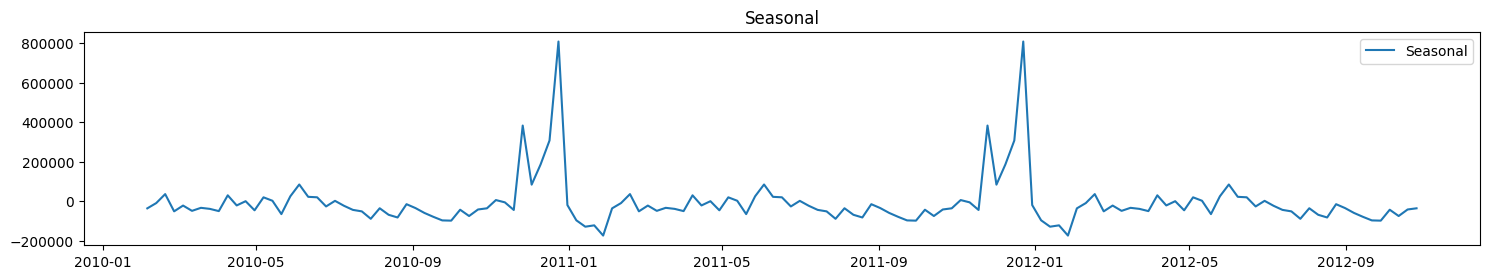

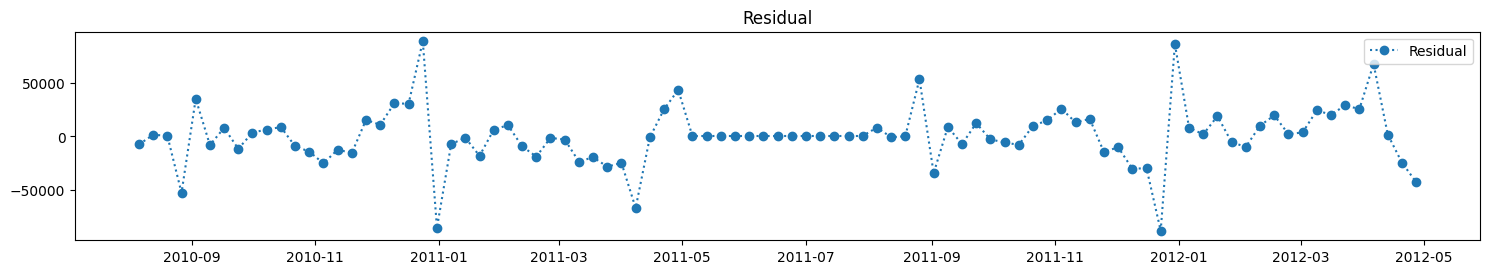

In [86]:
decompose_visual(store_45)

# Checking for stationarity

In [87]:
# adfuller test
adf_test(store_45)
# kpss test
kpss_test(store_45)

'ADF TEST' --> p_values :0.00000, Data is Stationary
'KPSS TEST' --> p_value :0.100000, Data is Stationary


<ipython-input-29-cccfbca5101f>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result=kpss(store)


**ACF and PACF Check**

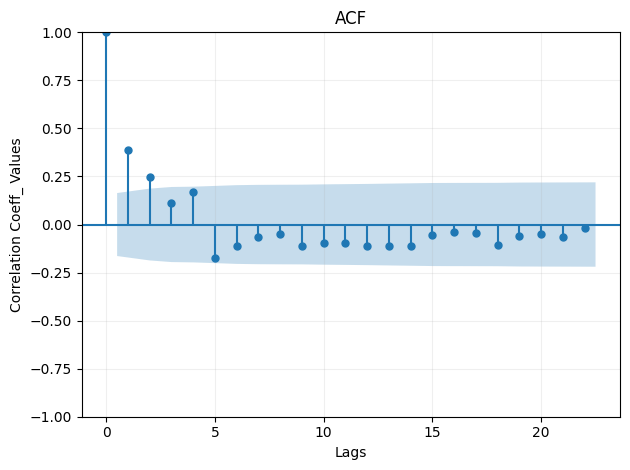

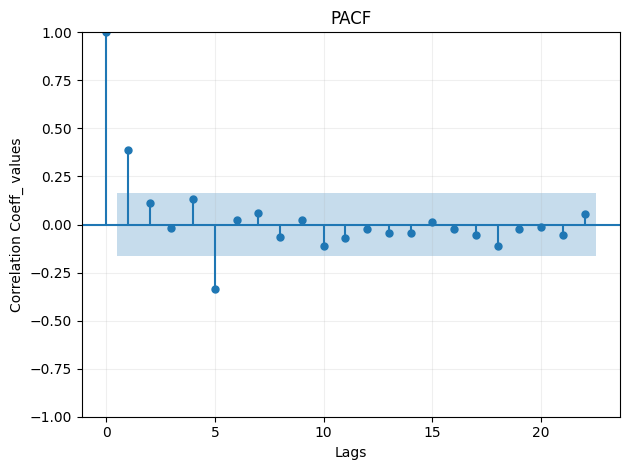

In [88]:
# as the data is stationary let's jump to the ACF and PACF
acf_pacf_check(store_45)

# from the ACF and PACF the lag values for p and q are :-

In [89]:
p = [1,5]
d = [0,1,2]
q = [1,2]

# finding the best order for the model building
find_best_order(store_45,p,d,q)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

                   RMSE
(1, 2, 1)  33244.863998
(1, 1, 2)  33739.664879
(1, 2, 2)  35468.728226
(5, 2, 2)  35895.979210
(5, 1, 1)  35916.652635
(1, 1, 1)  36314.050424
(1, 0, 1)  37002.526534
(5, 2, 1)  37187.841051
(5, 1, 2)  37270.545483
(5, 0, 2)  39438.311905


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# using best order and building an ARIMA Model

In [90]:
# as from the function we got order as (1,2,1) for p,d,q for least RMSE
# let's build an ARIMA model with this order

a_model_45=ARIMA(store_45,order=(1,2,1))
a_model_45=a_model_45.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


# ARIMA Model Predictions and Visualization of Forecast

Error : 33244.8639975405


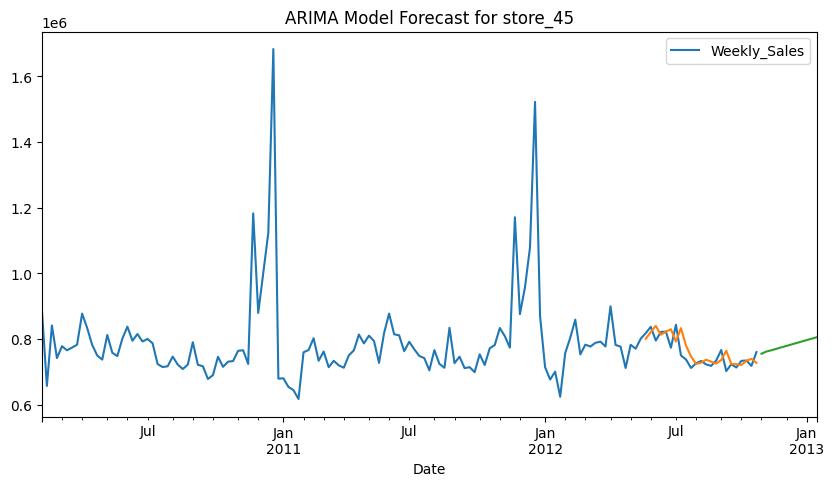

In [91]:
# Predictions and Accuarcy check : --
a_pred_45=a_model_45.predict(start=120,end=len(store_45)-1)
error_45=np.sqrt(mean_squared_error(store_45[120:],a_pred_45))
print(f"Error : {error_45}")

# forecasting for 12 weeks
a_forecast_45=a_model_45.get_forecast(steps=12)

# visualization
store_45.plot(figsize=(10,5))
a_pred_45.plot()
a_forecast_45.predicted_mean.plot()
plt.title("ARIMA Model Forecast for store_45")
plt.show()

# **SARIMAX Model**

In [92]:
# SARIMAX
s_model_45=SARIMAX(store_45,order=(1,2,1),seasonal_order=(1,2,1,52))
s_model_45=s_model_45.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


# **SARIMAX Model Forecast for Store_45**

Error : 60924.730971553676


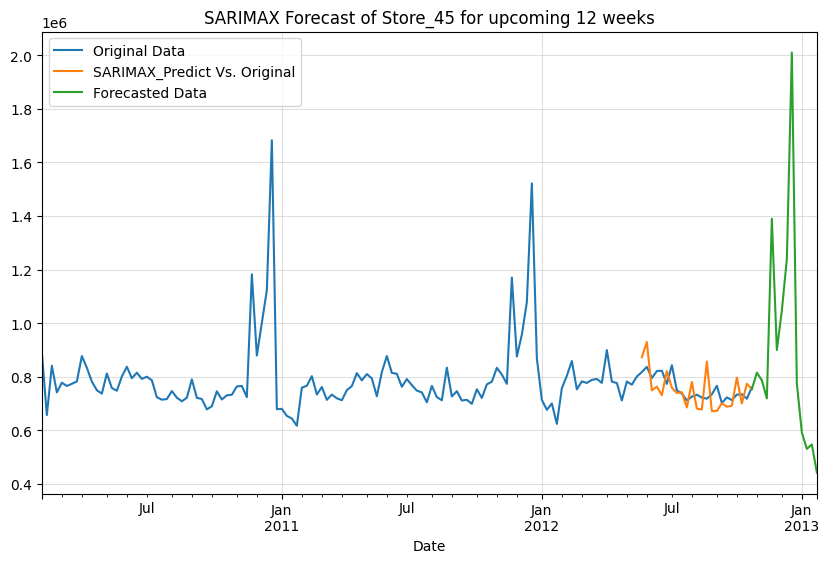

In [93]:
# Prediction and Accuracy Check :--
s_pred_45=s_model_45.predict(start=120,end=len(store_45)-1)
s_error_45=np.sqrt(mean_squared_error(store_45[120:],s_pred_45))
print(f"Error : {s_error_45}")

# forecasting for 12 weeks
s_forecast_45=s_model_45.get_forecast(steps=12)

# as the get_forecast will give the prediction from 12 week after the 26-10-2012 so we take 12 weeks from 26-10-2012
# Forecasting from 26-10-2012 to 12 weeks ahead.
s_forecast_45=s_model_45.predict(start=len(store_45)-1,end=len(store_45)+12)

# visualization of forecast
labels_45=['Original Data','SARIMAX_Predict Vs. Original', 'Forecasted Data']
store_45.plot(figsize=(10,6))
s_pred_45.plot()
s_forecast_45.plot()
plt.title("SARIMAX Forecast of Store_45 for upcoming 12 weeks")
plt.legend(labels_45,loc='upper left')
plt.grid(alpha=0.40)
plt.show()

# **All SARIMAX forecasting for Stores**

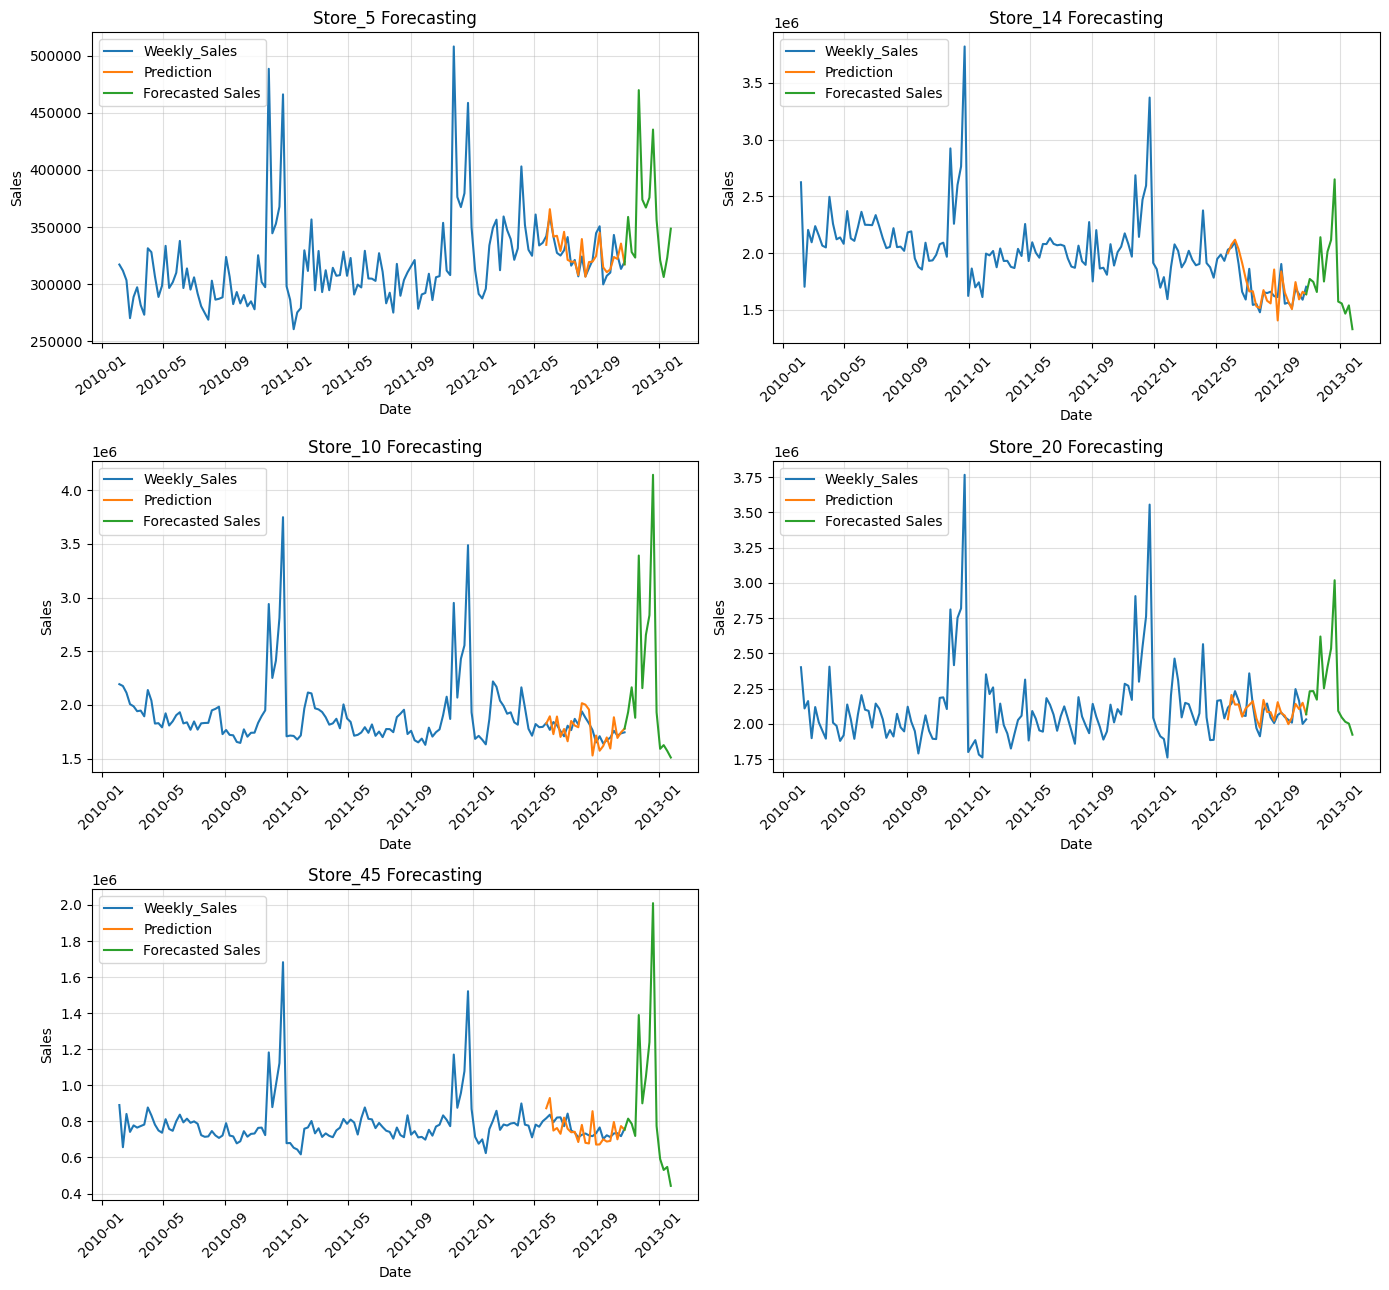

In [94]:
# visualizations of forecasting of all random selected stores:
# Canvas Size Adjustment
plt.figure(figsize=(14,13))

# Store_5
plt.subplot(3,2,1)
plt.plot(store_5,label='Weekly_Sales')
plt.plot(s2_pred,label='Prediction')
plt.plot(s2_forecast_5,label='Forecasted Sales')
plt.legend(loc='upper left')
plt.title("Store_5 Forecasting")
plt.xlabel('Date')
plt.ylabel("Sales")
plt.xticks(rotation=35)
plt.grid(alpha=0.40)


# Store_14
plt.subplot(3,2,2)
plt.plot(store_14,label='Weekly_Sales')
plt.plot(s2_pred_14,label='Prediction')
plt.plot(s2_forecast_14,label='Forecasted Sales')
plt.legend(loc='upper left')
plt.title("Store_14 Forecasting")
plt.xlabel('Date')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(alpha=0.40)

# Store_10
plt.subplot(3,2,3)
plt.plot(store_10,label='Weekly_Sales')
plt.plot(s_pred_10,label='Prediction')
plt.plot(s_forecast_10,label='Forecasted Sales')
plt.legend(loc='upper left')
plt.title("Store_10 Forecasting")
plt.xlabel('Date')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(alpha=0.40)

# Store_20
plt.subplot(3,2,4)
plt.plot(store_20,label='Weekly_Sales')
plt.plot(s_pred_20,label='Prediction')
plt.plot(s_forecast_20,label='Forecasted Sales')
plt.legend(loc='upper left')
plt.title("Store_20 Forecasting")
plt.xlabel('Date')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(alpha=0.40)

# Store_45
plt.subplot(3,2,5)
plt.plot(store_45,label='Weekly_Sales')
plt.plot(s_pred_45,label='Prediction')
plt.plot(s_forecast_45,label='Forecasted Sales')
plt.legend(loc='upper left')
plt.title("Store_45 Forecasting")
plt.xlabel('Date')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(alpha=0.40)

plt.tight_layout()
plt.show()

# **Thank You**